# Lab 1: Linear Regression

### Import the necessary libraries for data exploration and visualisation

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

%matplotlib inline

In [2]:
# Load data

data = pd.read_csv('COVID-19_geo_timeseries_ver_0311.csv')
data.head()  #previewdata

province country  latitude   longitude  confirmed_cases  deaths  \
0      Hubei   China  35.86166  104.195397              729    39.0   
1  Guangdong   China  35.86166  104.195397               53     0.0   
2   Zhejiang   China  35.86166  104.195397               43     0.0   
3    Beijing   China  35.86166  104.195397               36     0.0   
4  Chongqing   China  35.86166  104.195397               27     0.0   

   recovered          update_time data_source country_code region  \
0        NaN  2020-01-24 14:55:00         bno          CHN   Asia   
1        NaN  2020-01-24 14:55:00         bno          CHN   Asia   
2        NaN  2020-01-24 14:55:00         bno          CHN   Asia   
3        NaN  2020-01-24 14:55:00         bno          CHN   Asia   
4        NaN  2020-01-24 14:55:00         bno          CHN   Asia   

                                 country_flag  
0  https://www.countryflags.io/cn/flat/64.png  
1  https://www.countryflags.io/cn/flat/64.png  
2  https://www.countryflags.io/cn/flat/64.png  
3  https://www.countryflags.io/cn/flat/64.png  
4  https://www.countryflags.io/cn/flat/64.png

### Exploring the dataset



In [3]:
#In the dataframe the last four columns are irrelevnt to our analyses, therefore they will be removed

data = data.drop(['latitude', 'longitude','data_source', 'country_code', 'region','country_flag'], axis = 1) #we also drop latitude and longitude as the province itself will suffice 

In [4]:
#data.describe()  #data summary

In [5]:
data['country'].describe()  #  There are 140 countries in the dataset

count     24791
unique      140
top       China
freq      21057
Name: country, dtype: object

In [5]:
data_countries = data.groupby(by = 'country')
data_countries.head()

NameError: name 'df' is not defined

### Handling missing values 

In [7]:
#check the missing values 
data.isnull().sum()          

province            2308
country                0
confirmed_cases        0
deaths                 6
recovered          19856
update_time            0
dtype: int64

In [8]:
## Replace the missing values of the province with the word 'Province'

data['province'].fillna('Province', inplace = True)

In [9]:
# Calculate the mean deaths of the provinces for each row
mean_death_country = data.groupby('country')['deaths'].mean()
#mean_death_country.describe()

In [10]:
# Iterate over the rows with missing 'deaths'
for index, row in data[data['deaths'].isnull()].iterrows():
    country = row['country']
    if not pd.isnull(country) and country in mean_death_country:
        # Fill missing 'deaths' with the mean value of the corresponding country
        data.at[index, 'deaths'] = mean_death_country[country]

In [11]:
# Calculate the mean recoveries of the provinces for each row
mean_recoveries = data.groupby('country')['recovered'].mean()

# Iterate over the rows with missing recoveries:
for index, row in data[data['recovered'].isnull()].iterrows():
    country = row['country']
    if not pd.isnull(country) and country in mean_recoveries:
        # Fill missing 'deaths' with the mean value of the corresponding country
        data.at[index, 'recovered'] = mean_recoveries[country]

In [12]:
#check again:
data.isnull().sum()

province            0
country             0
confirmed_cases     0
deaths              0
recovered          49
update_time         0
dtype: int64

In [13]:
## There are still 49 missing values in the recovered column. Isolate this column with the view of only the missing values:

In [14]:
d2 = data[data['recovered'].isnull()]
d2.head(50)

province        country  confirmed_cases  deaths  recovered  \
35    Province  United States                2     0.0        NaN   
79    Province  United States                2     0.0        NaN   
121   Province  United States                2     0.0        NaN   
164   Province  United States                2     0.0        NaN   
207   Province  United States                2     0.0        NaN   
246   Province  United States                4     0.0        NaN   
283   Province  United States                5     0.0        NaN   
331   Province  United States                5     0.0        NaN   
377   Province  United States                5     0.0        NaN   
424   Province  United States                5     0.0        NaN   
469   Province  United States                5     0.0        NaN   
514   Province  United States                5     0.0        NaN   
562   Province  United States                5     0.0        NaN   
612   Province  United States                5     0.0        NaN   
615   Province            UAE                4     0.0        NaN   
660   Province  United States                6     0.0        NaN   
665   Province            UAE                4     0.0        NaN   
713   Province  United States                5     0.0        NaN   
716   Province            UAE                4     0.0        NaN   
764   Province  United States                5     0.0        NaN   
767   Province            UAE                4     0.0        NaN   
815   Province  United States                7     0.0        NaN   
819   Province            UAE                4     0.0        NaN   
860   Province    Undisclosed               23     0.0        NaN   
873   Province  United States                7     0.0        NaN   
877   Province            UAE                4     0.0        NaN   
931   Province  United States                6     0.0        NaN   
934   Province            UAE                4     0.0        NaN   
948   Province    Undisclosed              557     0.0        NaN   
985   Province  United States                8     0.0        NaN   
990   Province            UAE                5     0.0        NaN   
1043  Province  United States                7     0.0        NaN   
1047  Province            UAE                4     0.0        NaN   
1100  Province  United States                7     0.0        NaN   
1104  Province            UAE                4     0.0        NaN   
1158  Province  United States                8     0.0        NaN   
1161  Province            UAE                5     0.0        NaN   
1213  Province  United States                9     0.0        NaN   
1218  Province            UAE                5     0.0        NaN   
1268  Province  United States               11     0.0        NaN   
1275  Province            UAE                5     0.0        NaN   
1298  Province    Undisclosed              286     0.0        NaN   
1327  Province  United States               11     0.0        NaN   
1333  Province            UAE                5     0.0        NaN   
1383  Province  United States               11     0.0        NaN   
1390  Province            UAE                5     0.0        NaN   
1417  Province    Undisclosed              206     0.0        NaN   
1443  Province  United States               11     0.0        NaN   
1448  Province            UAE                5     0.0        NaN   

              update_time  
35    2020-01-24 14:55:00  
79    2020-01-25 17:05:00  
121   2020-01-25 03:16:00  
164   2020-01-25 05:20:00  
207   2020-01-25 04:58:00  
246   2020-01-26 13:24:00  
283   2020-01-26 16:14:00  
331   2020-01-27 15:34:00  
377   2020-01-27 18:54:00  
424   2020-01-27 20:10:00  
469   2020-01-27 03:18:00  
514   2020-01-28 02:20:00  
562   2020-01-28 06:33:00  
612   2020-01-29 17:40:00  
615   2020-01-29 17:40:00  
660   2020-01-30 12:35:00  
665   2020-01-30 12:35:00  
713   2020-01-30 00:27:00  
716   2020-01-30 00:27:

In [15]:
data['recovered'].fillna(data['confirmed_cases'], inplace=True)

In [16]:
#check again:
data.isnull().sum()  ## No more missing values found 

province           0
country            0
confirmed_cases    0
deaths             0
recovered          0
update_time        0
dtype: int64

In [17]:
data.describe()  #data summary

confirmed_cases        deaths     recovered
count     24791.000000  24791.000000  24791.000000
mean        506.282038     12.101186    483.976343
std        3203.578500    111.370087    985.696105
min           0.000000      0.000000      0.000000
25%           8.000000      0.000000    568.075561
50%          50.000000      0.000000    568.075561
75%         202.000000      1.000000    568.075561
max       67773.000000   3046.000000  49134.000000

### Visualizations

In [18]:
df = data.groupby(['country'])[['deaths', 'recovered', 'confirmed_cases']].sum()


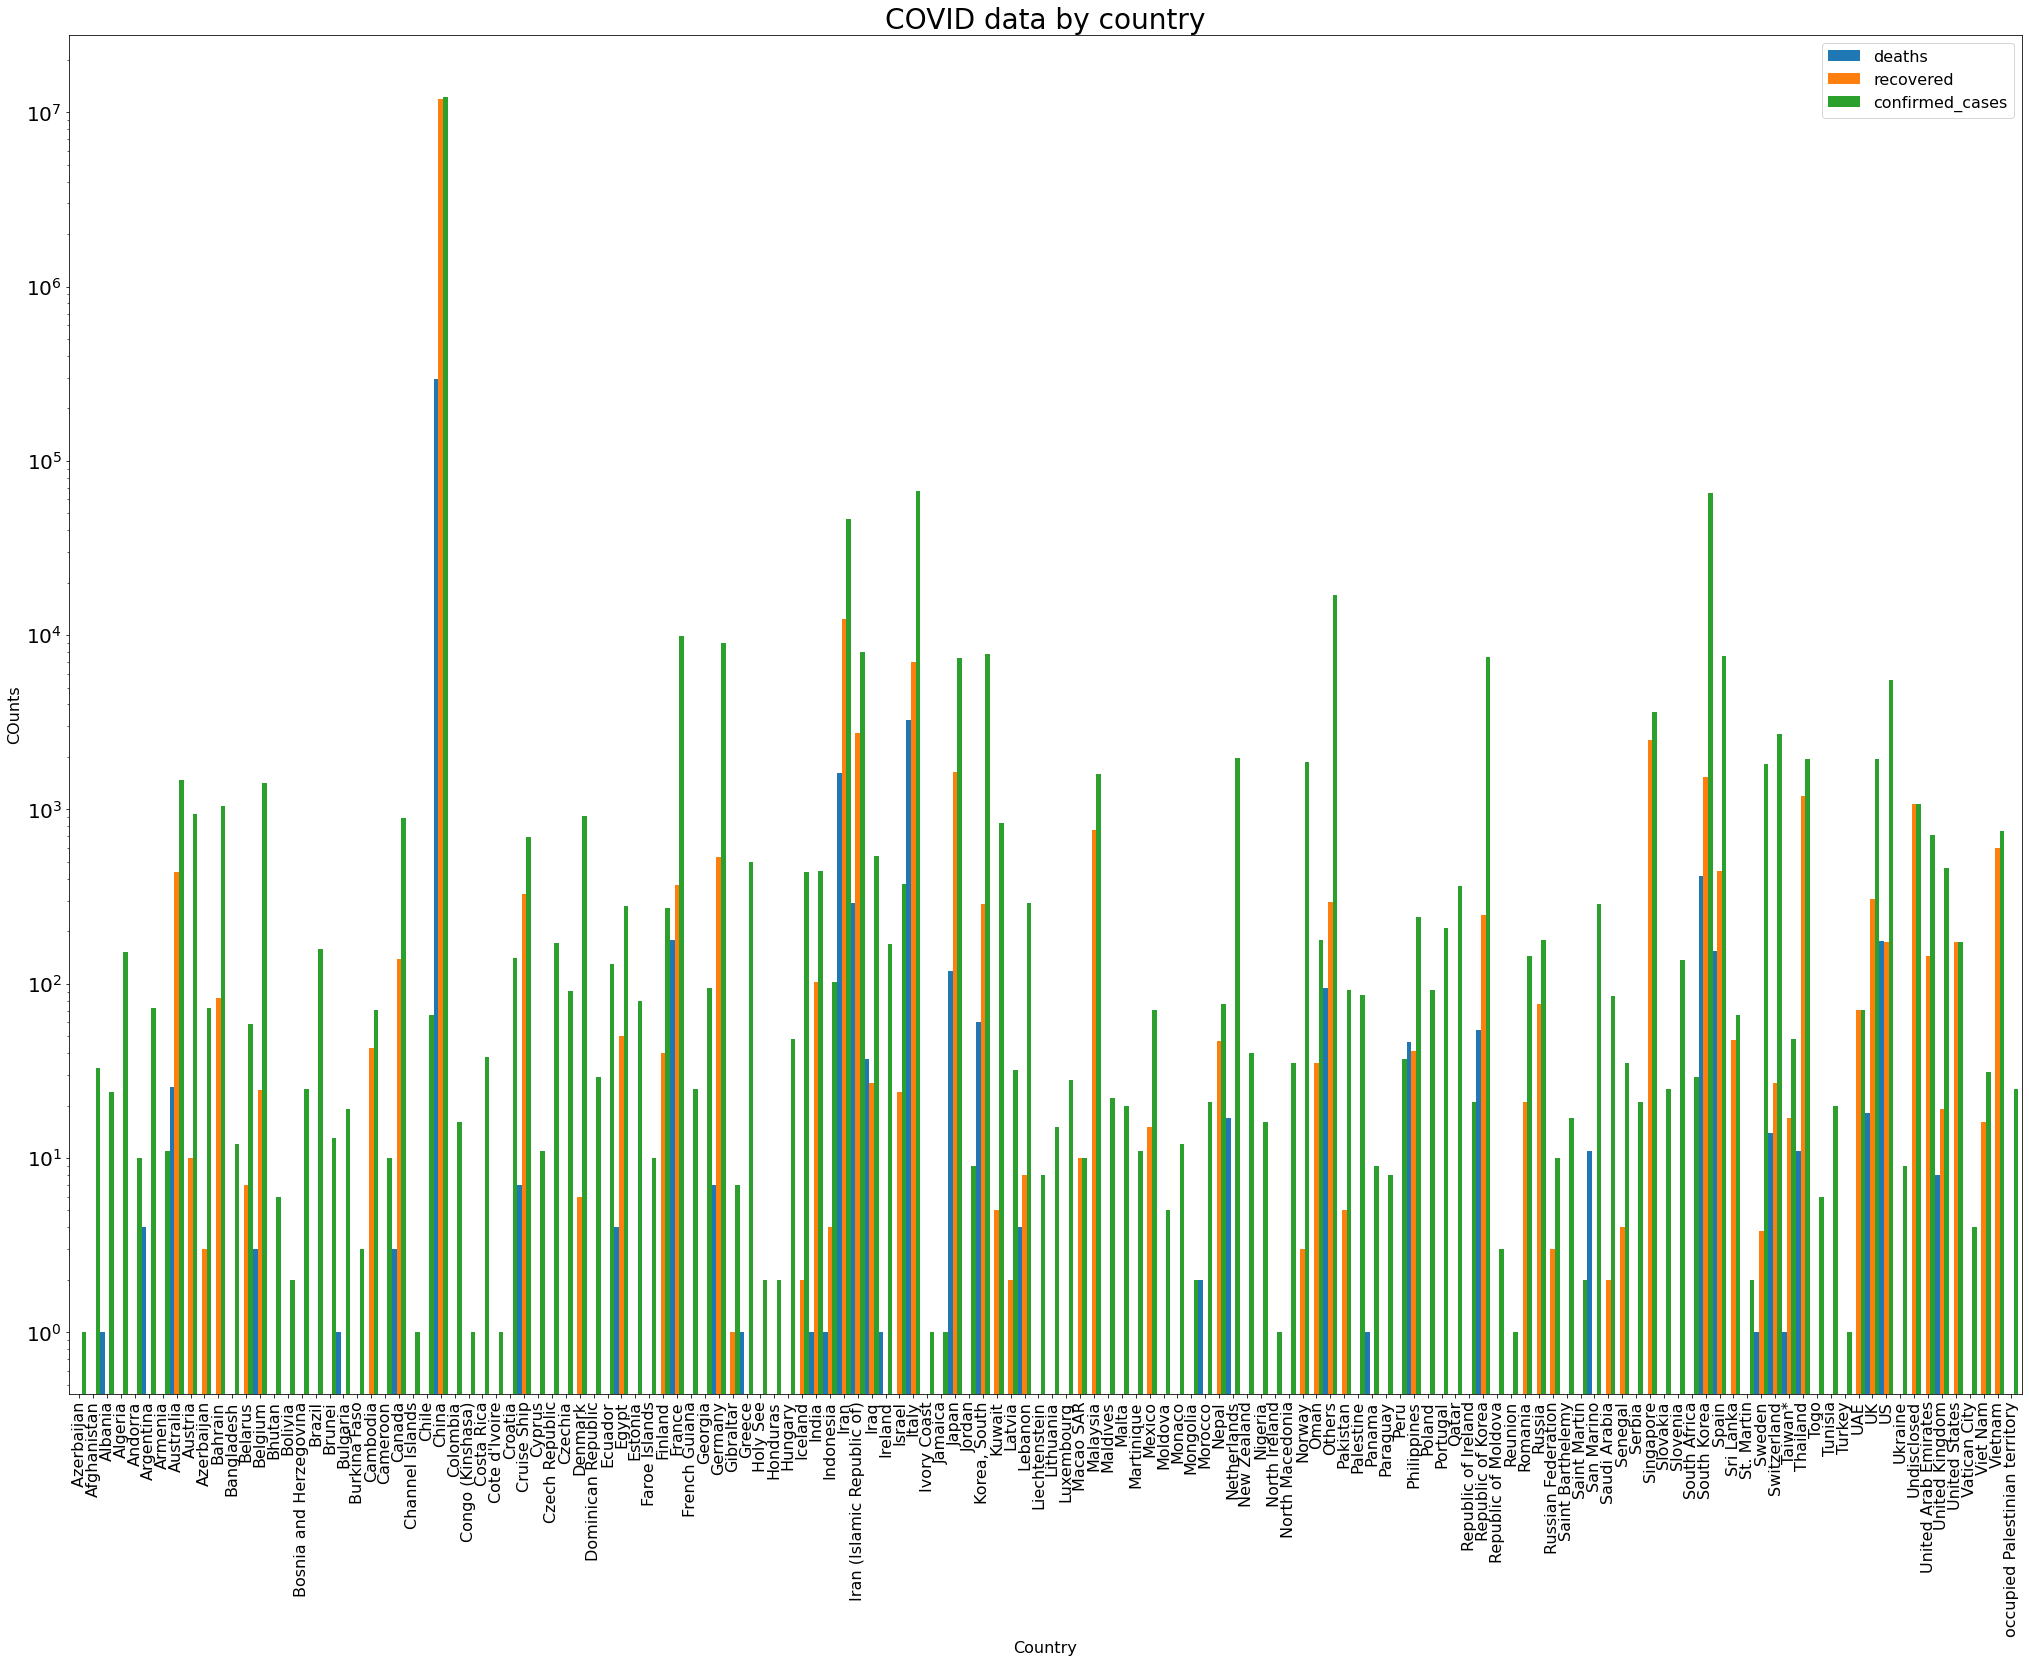

In [19]:
#bar chart 
df.plot(kind='bar', figsize=(35, 25), width=1)

plt.ylabel('COunts', fontsize=16)
plt.yscale('log')  # Set the y-axis to log scale to get full view of data
plt.xlabel ('Country', fontsize=16)
plt.title('COVID data by country', fontsize=28)

plt.xticks(range(len(df.index)), df.index, rotation=90, fontsize=16)
plt.yticks(fontsize=20)
plt.legend(fontsize=16)

plt.show()  ### Zoom in for a clearer view

In [20]:
# Convert the 'update_time' column to datetime data type
df['update_time'] = pd.to_datetime(data['update_time'])

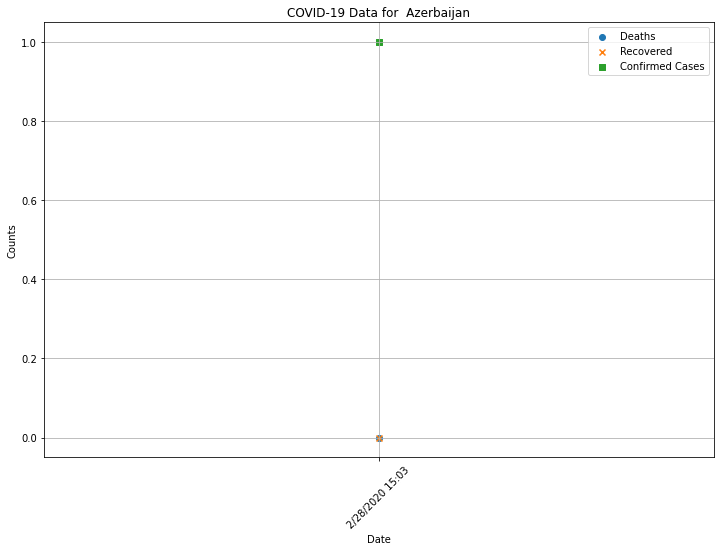

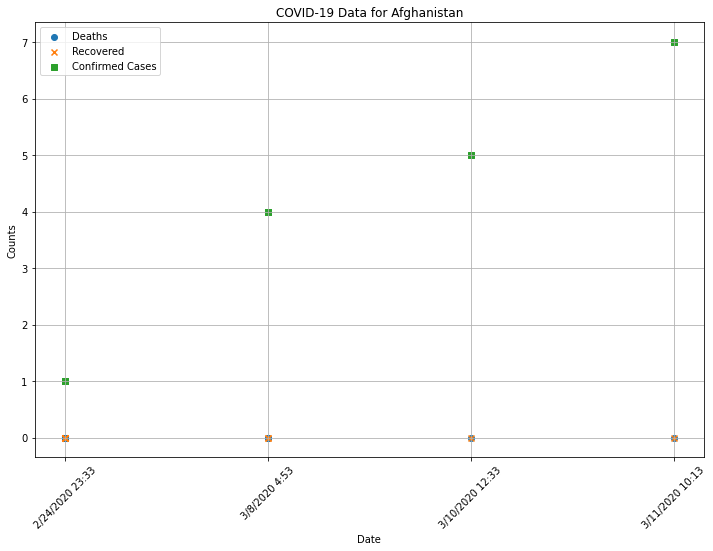

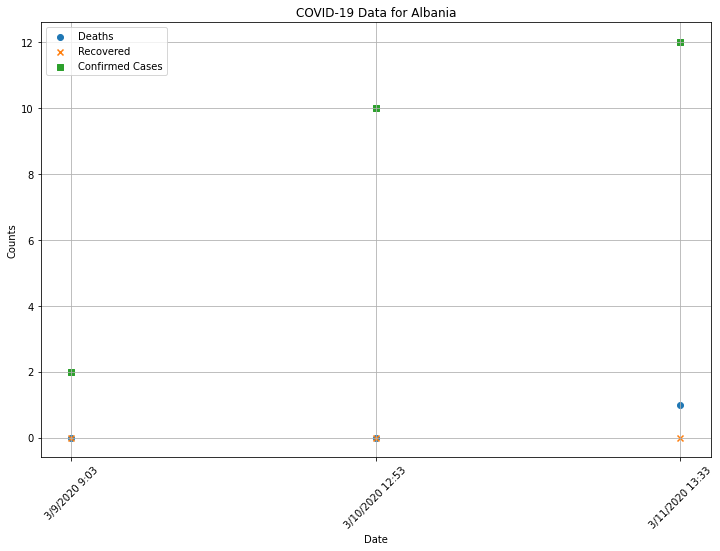

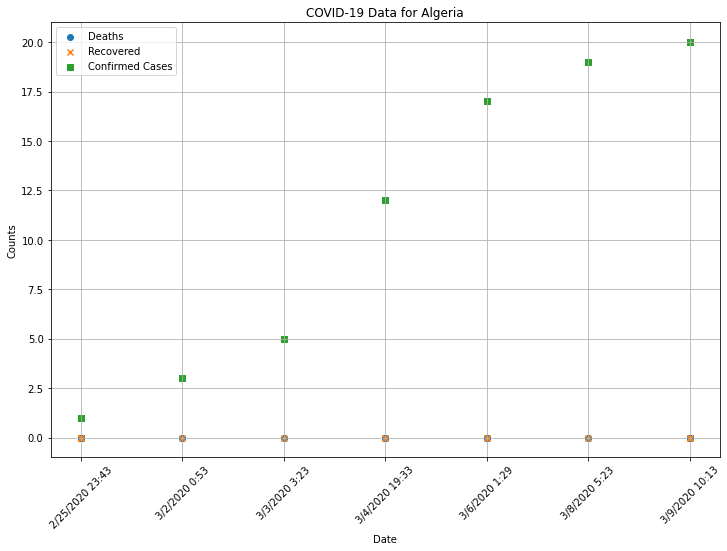

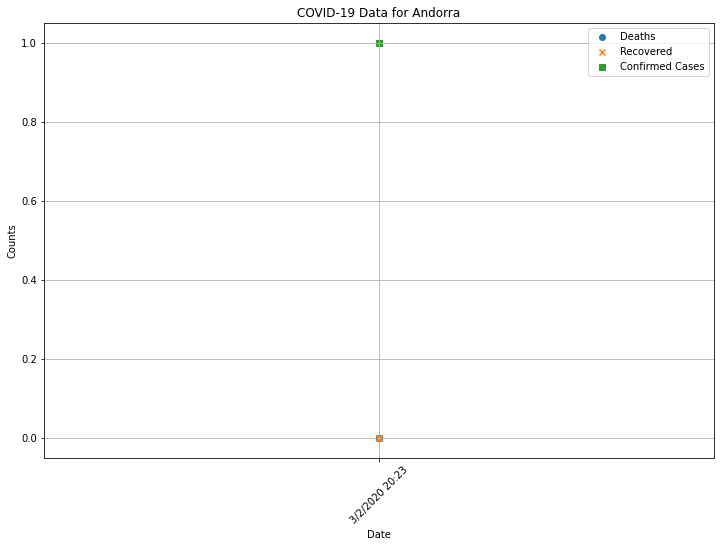

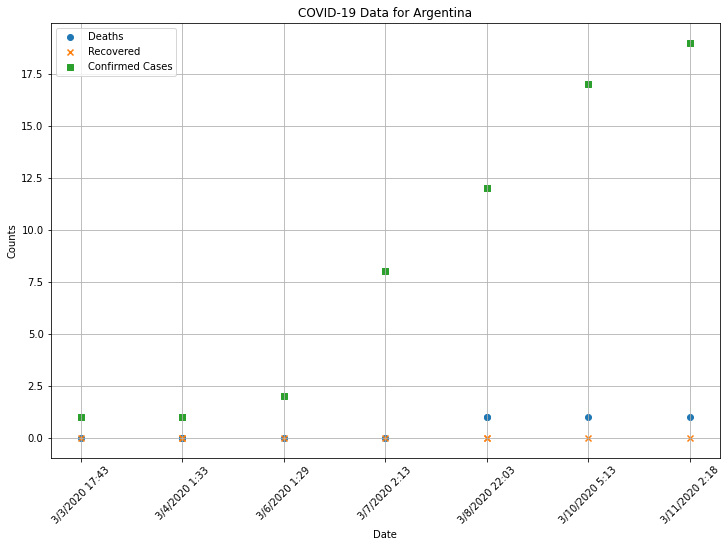

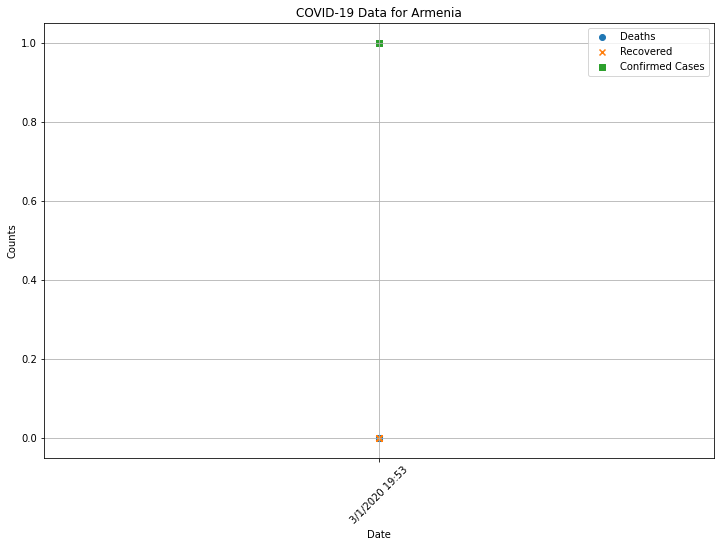

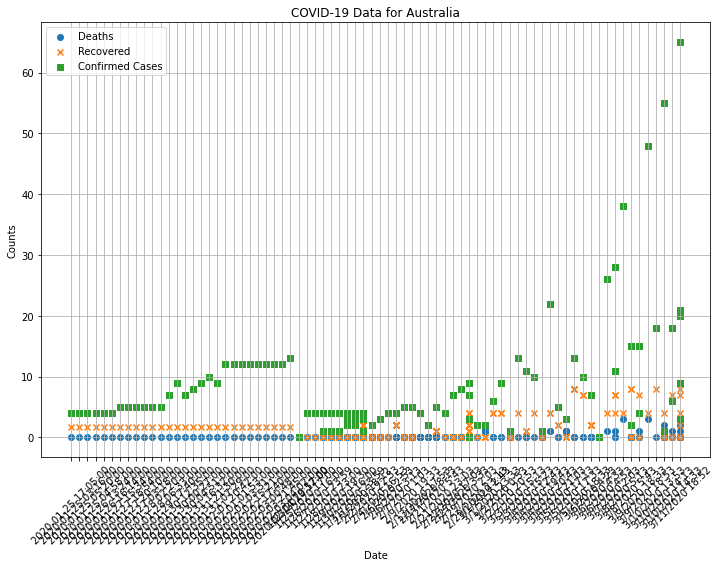

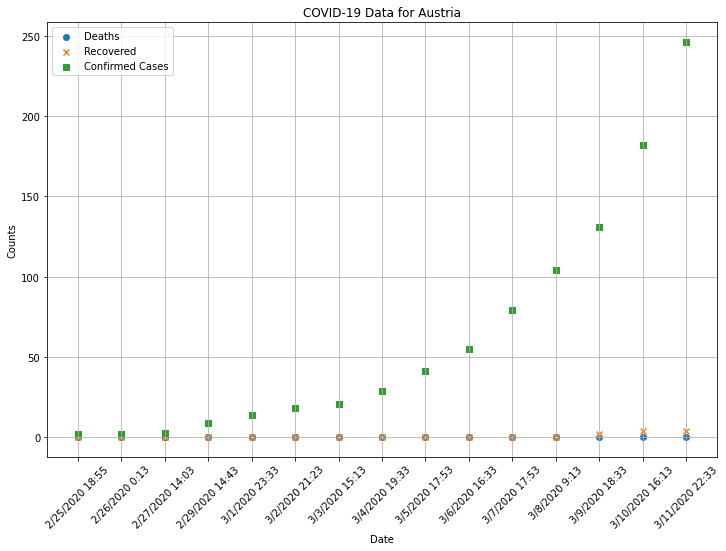

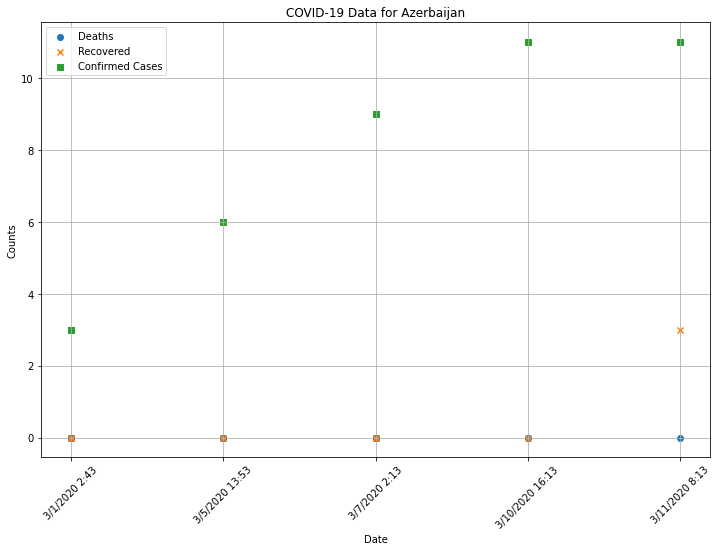

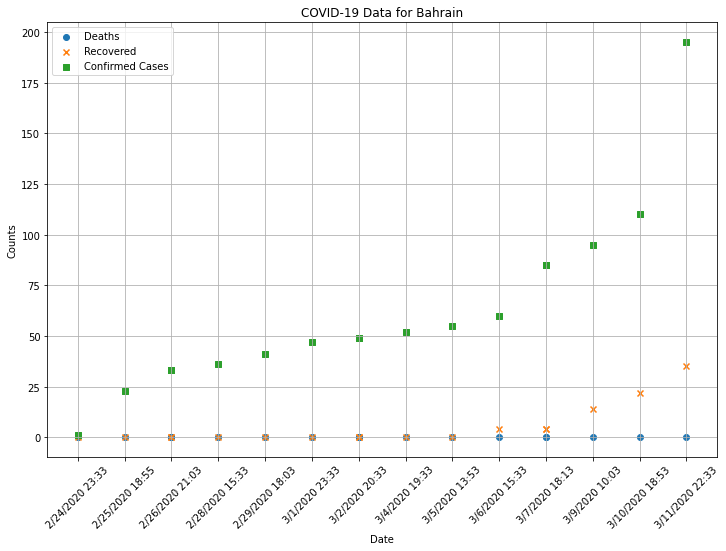

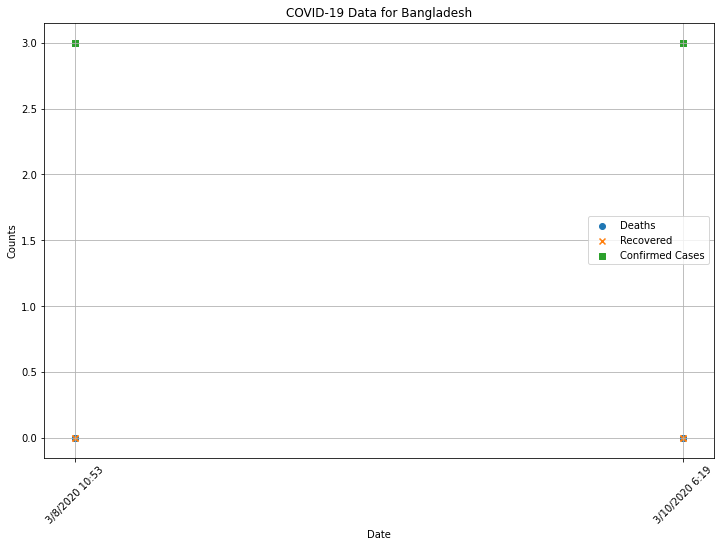

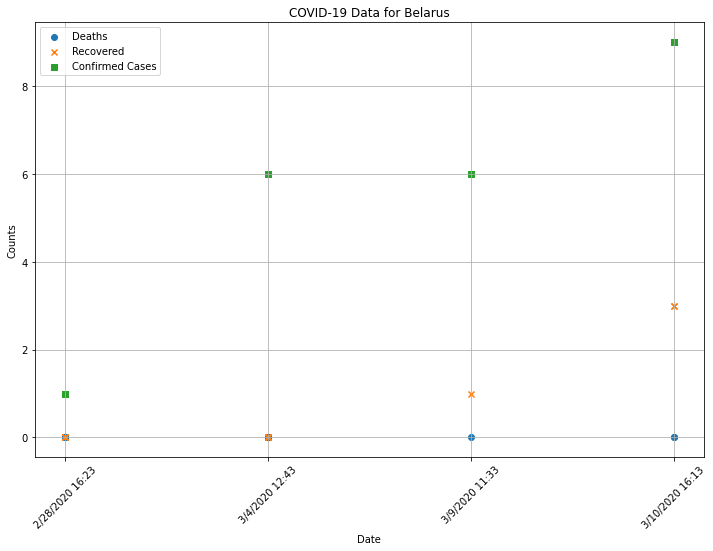

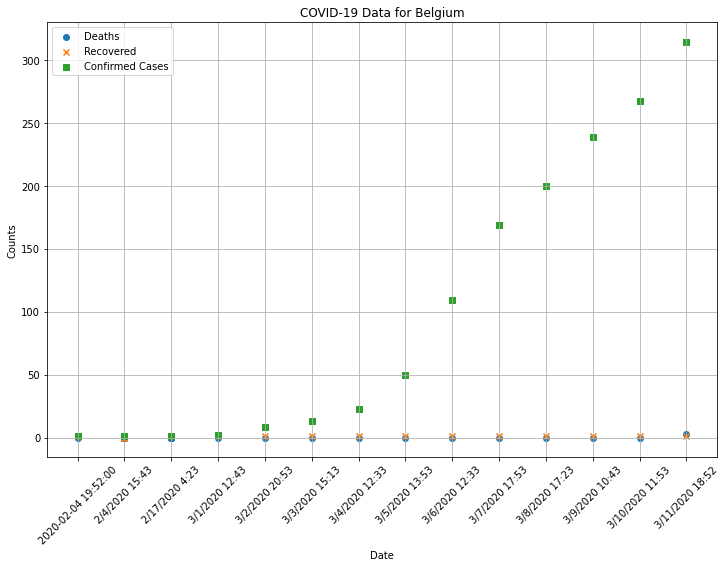

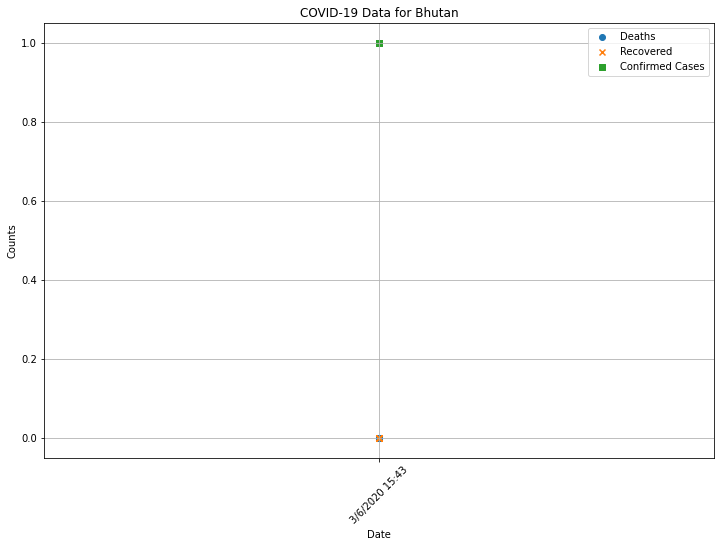

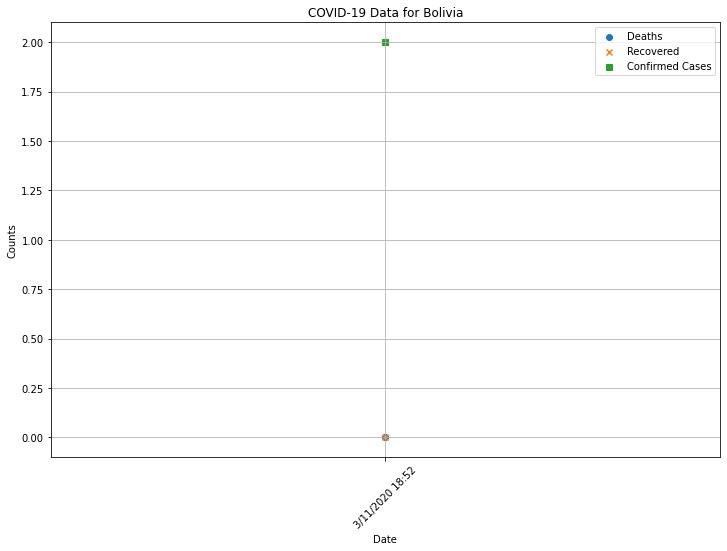

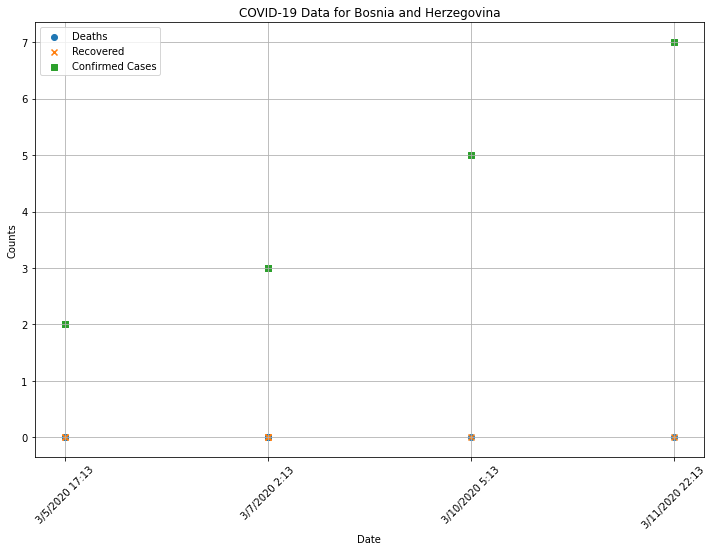

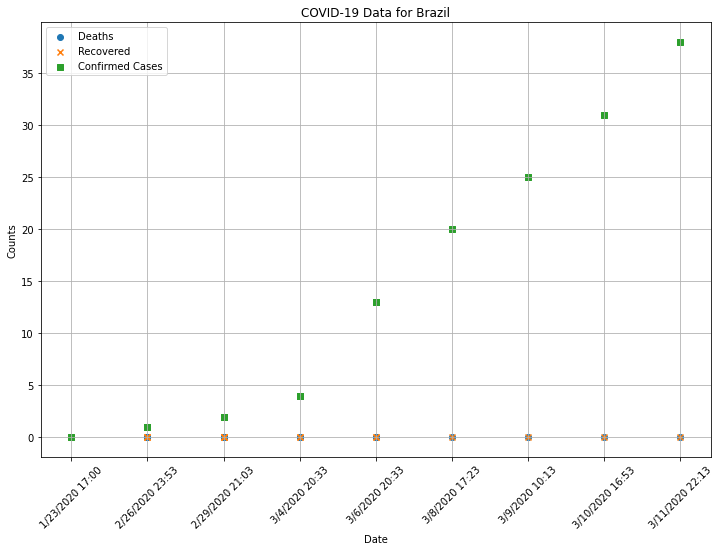

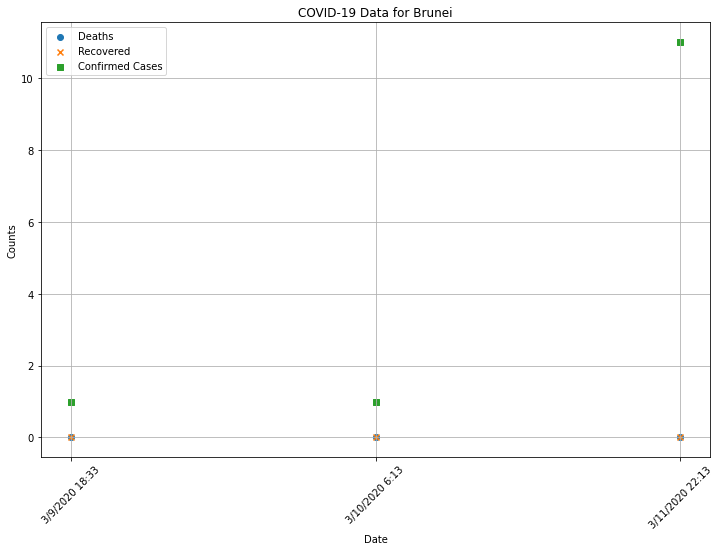

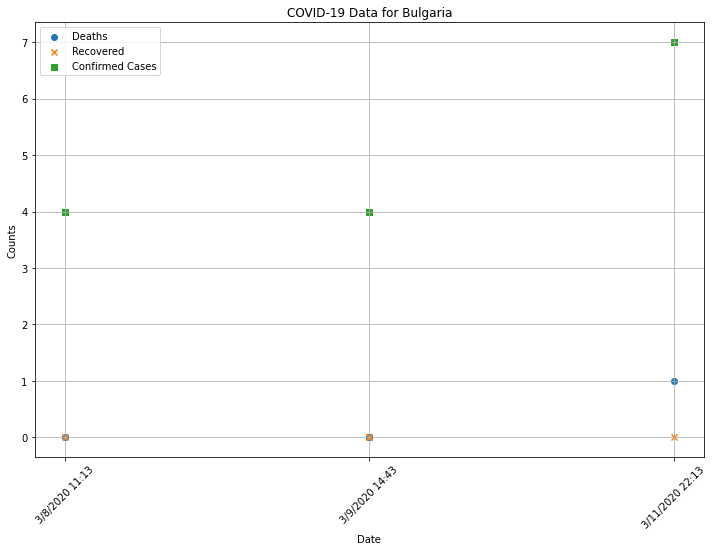

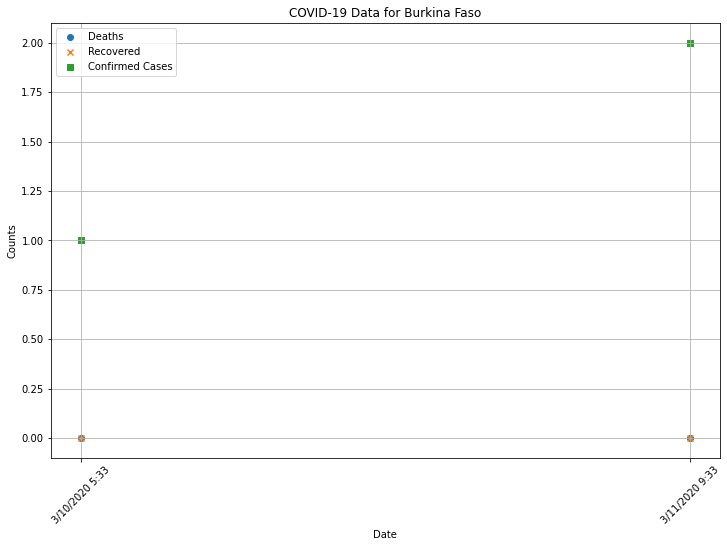

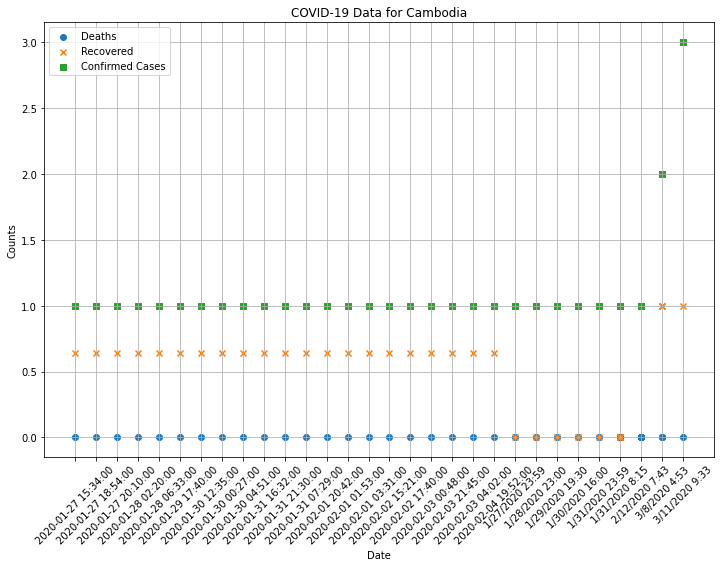

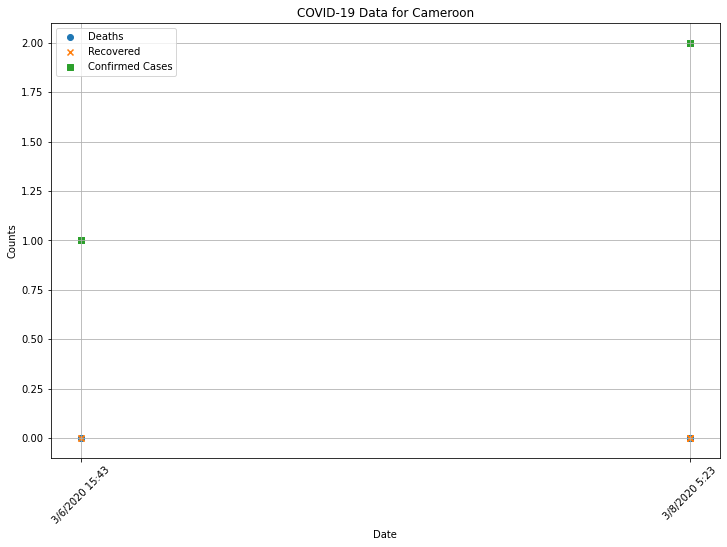

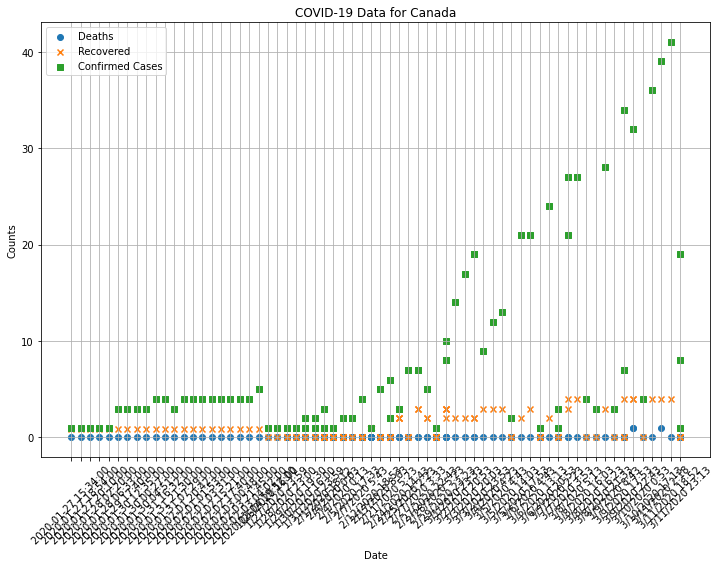

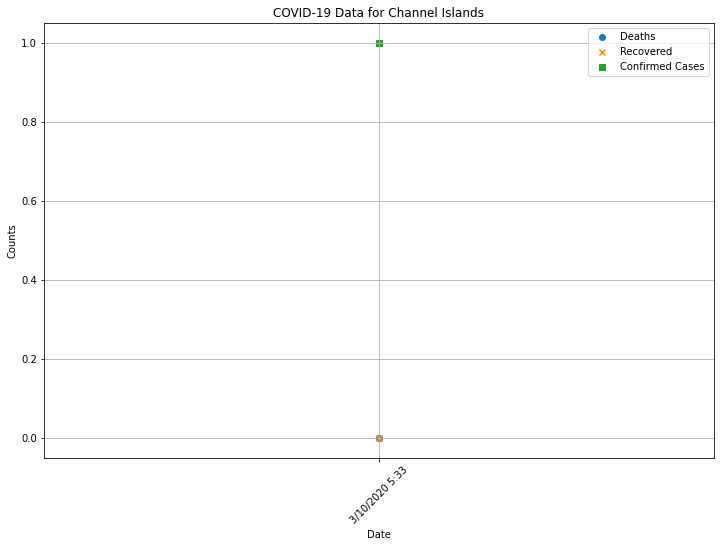

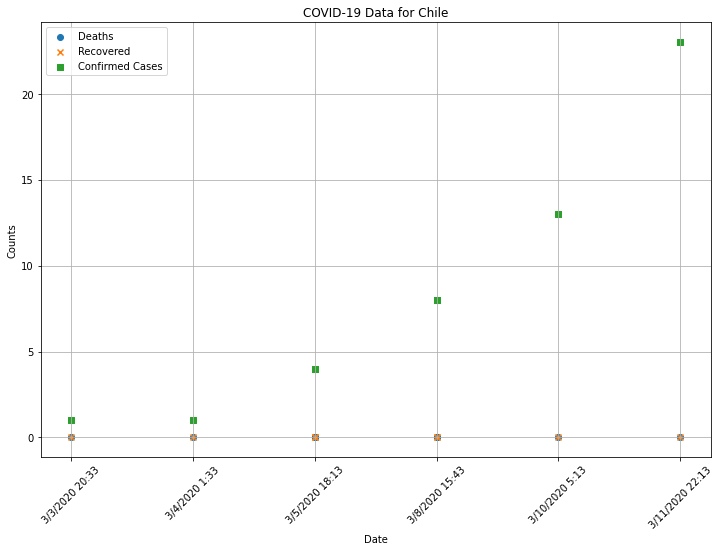

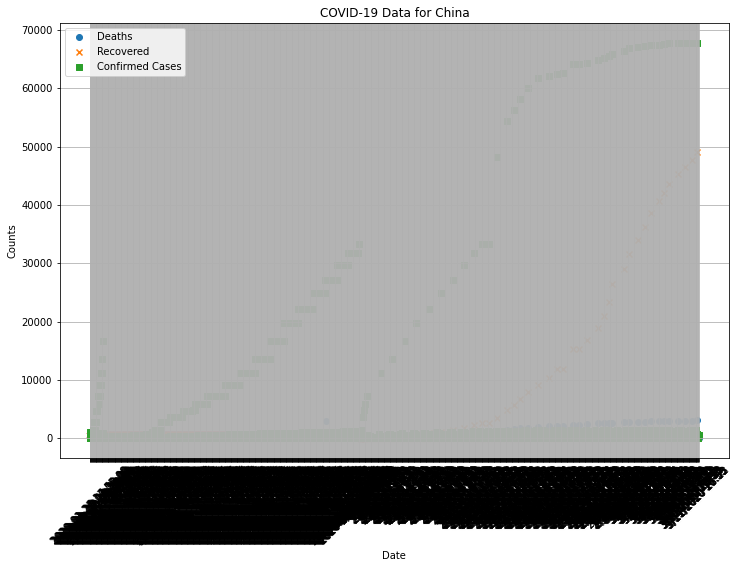

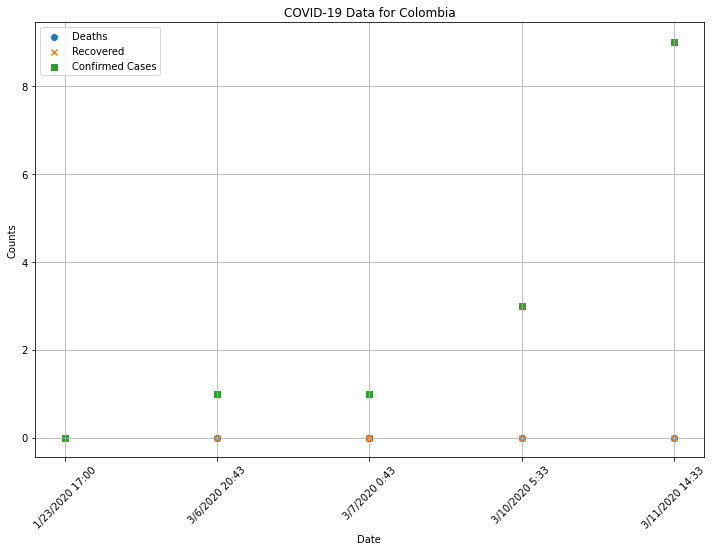

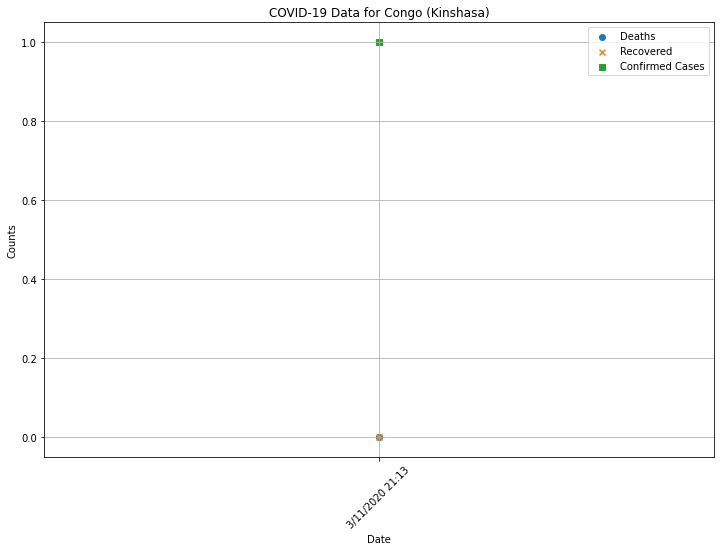

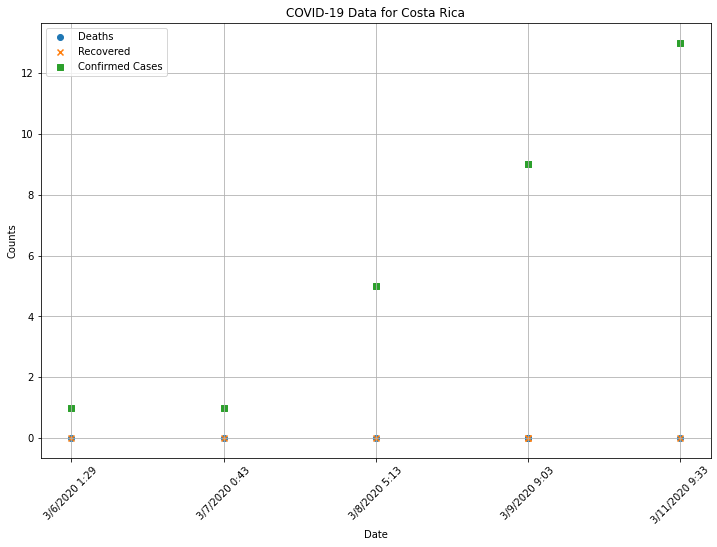

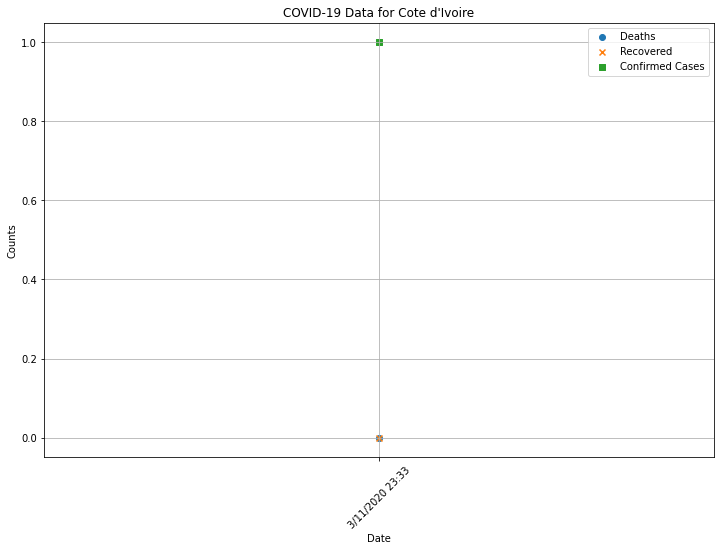

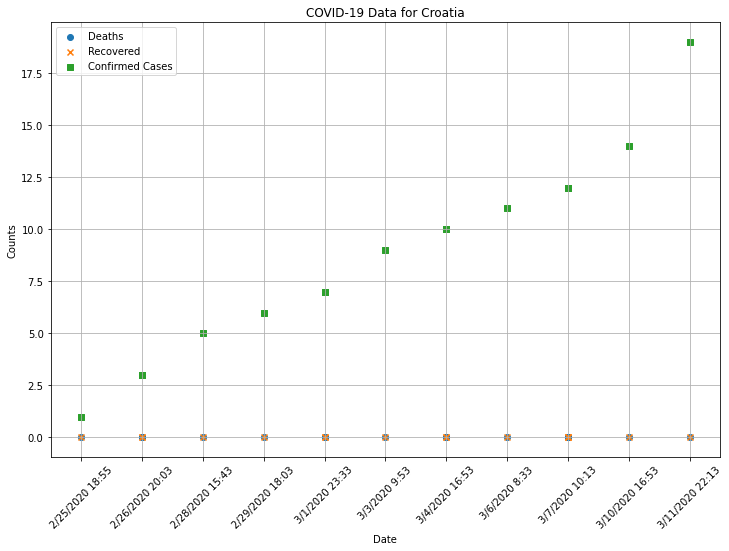

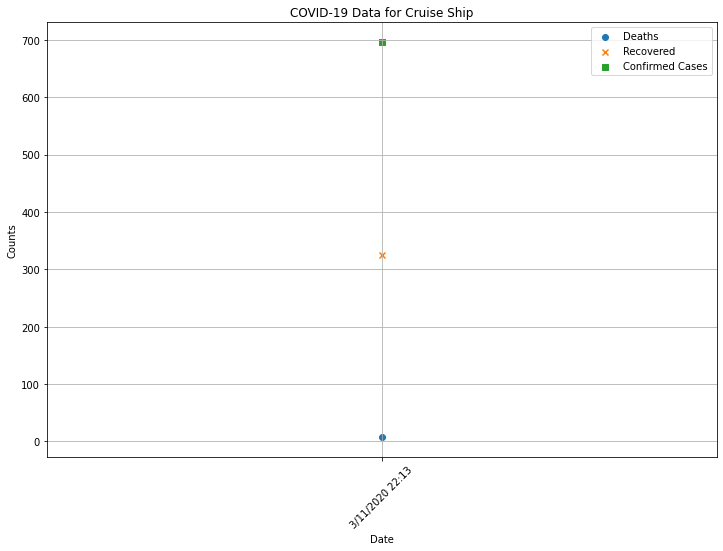

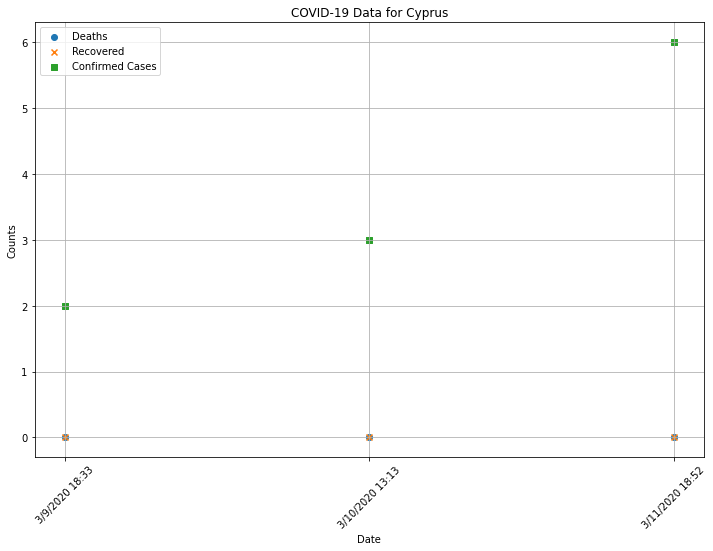

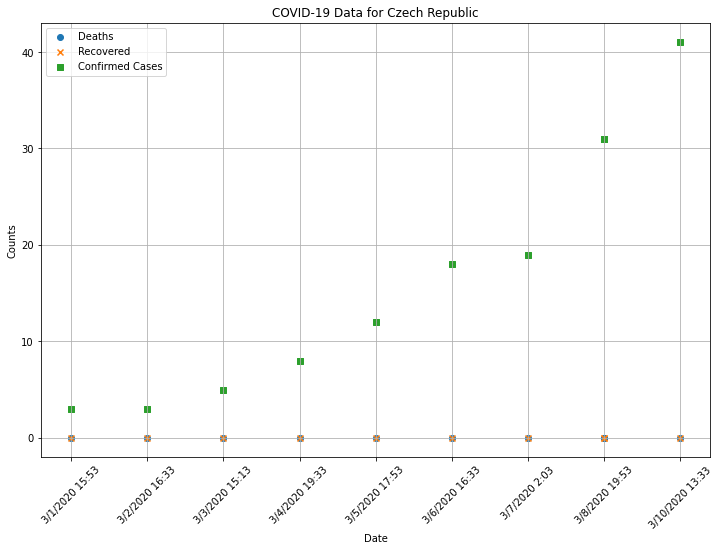

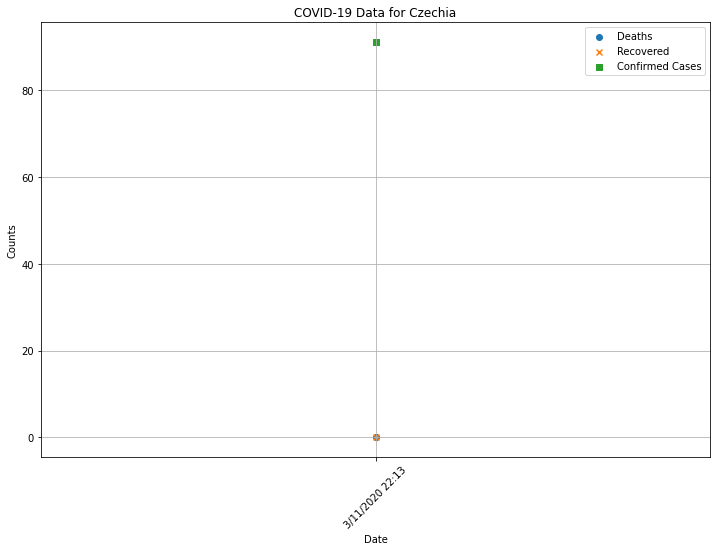

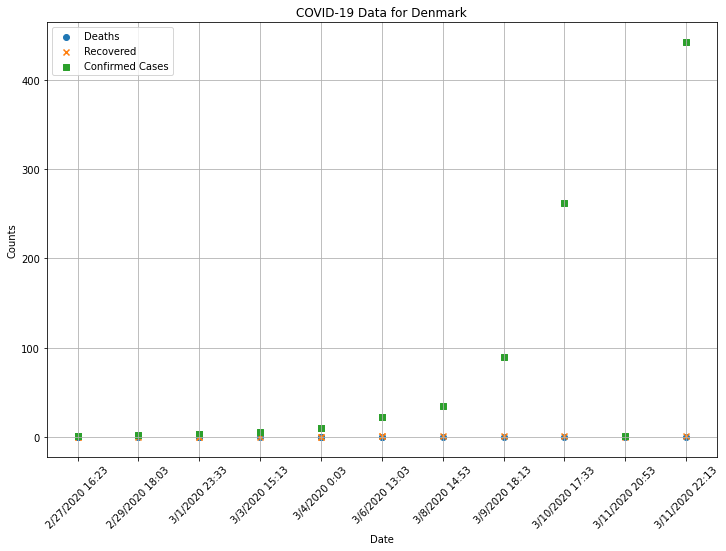

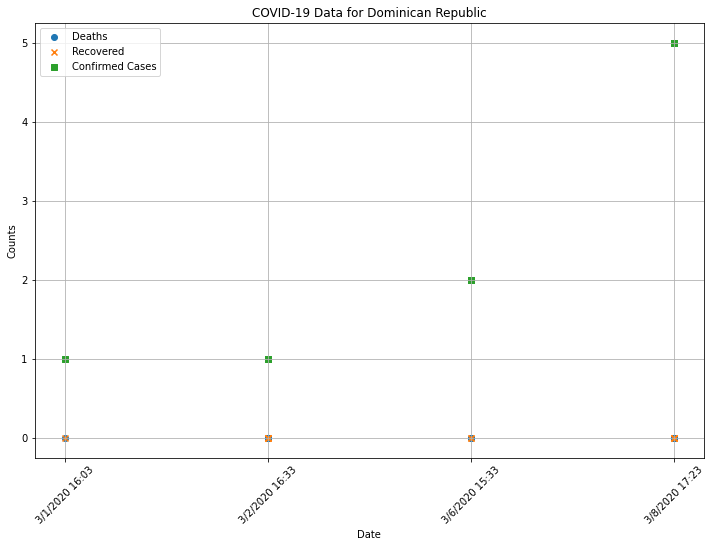

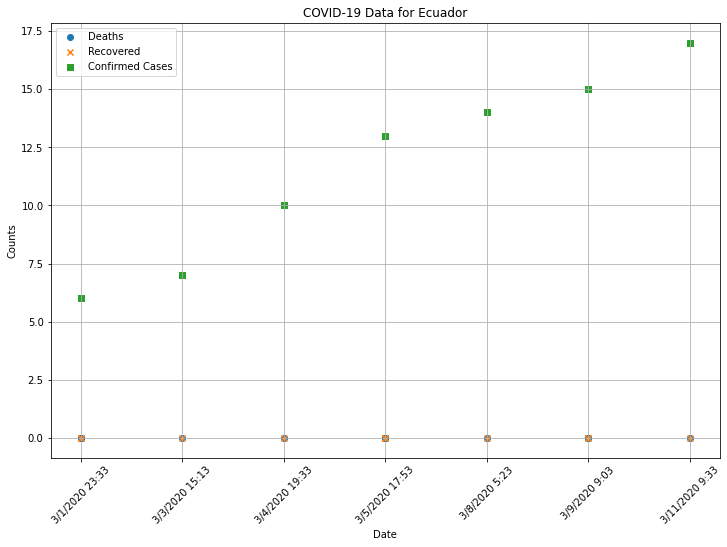

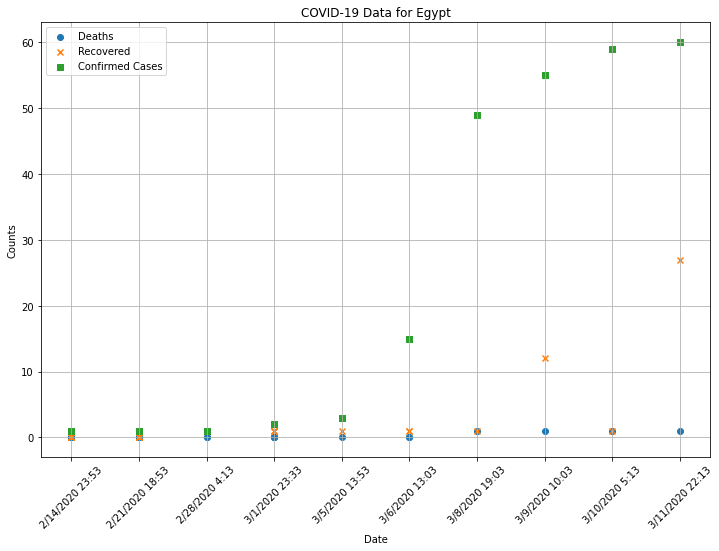

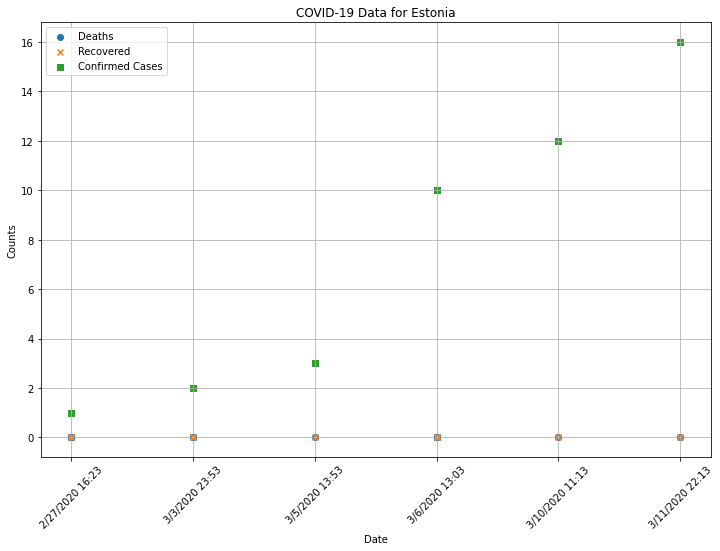

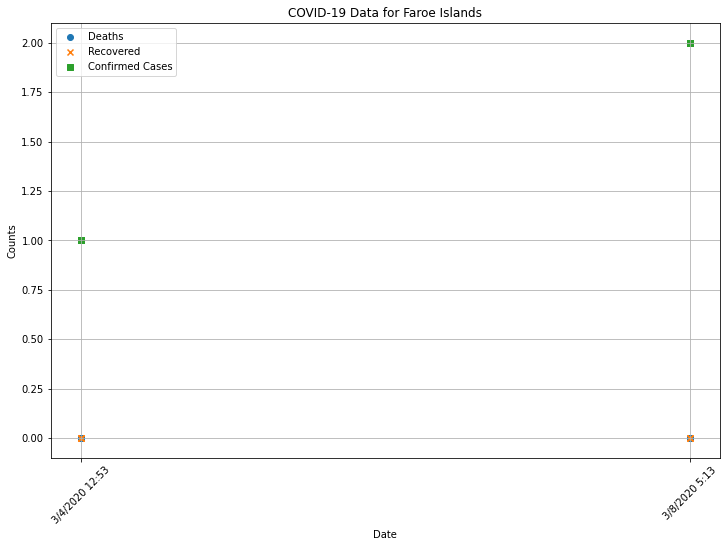

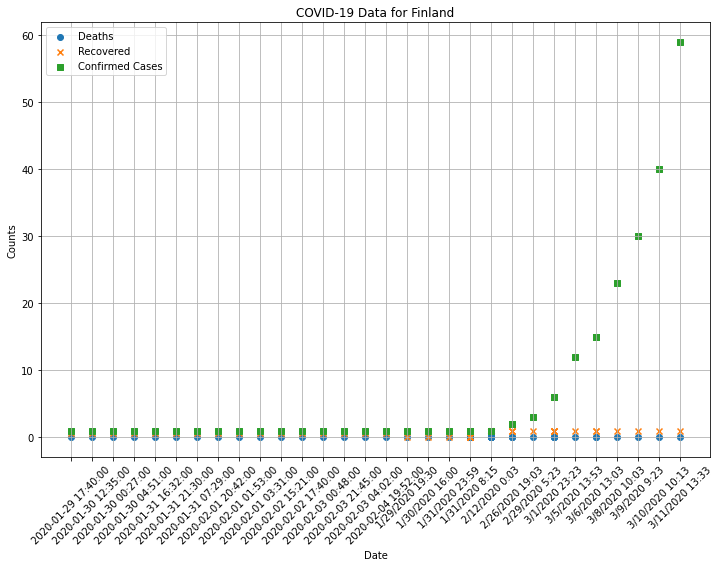

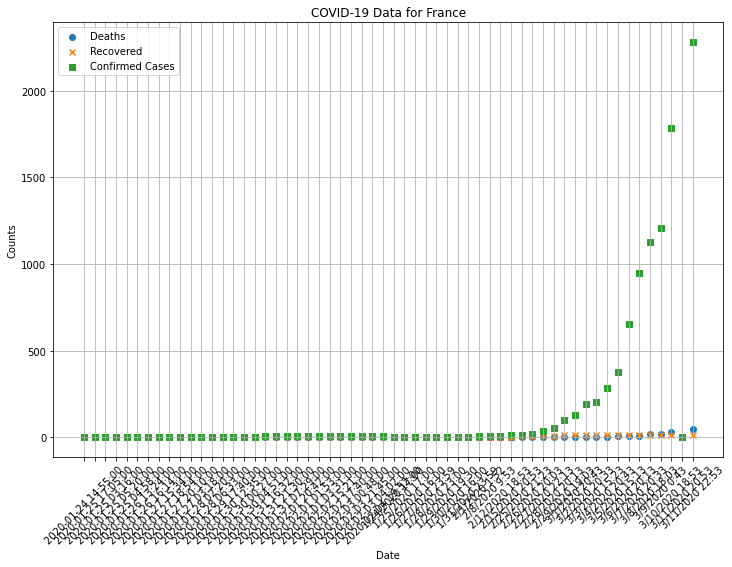

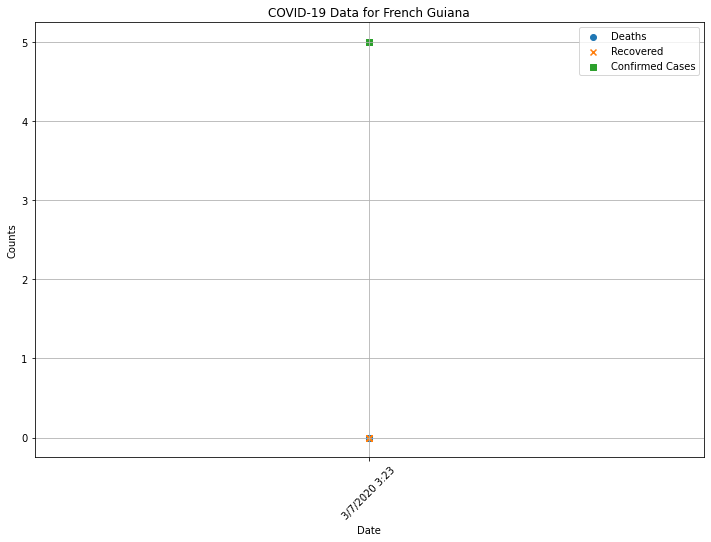

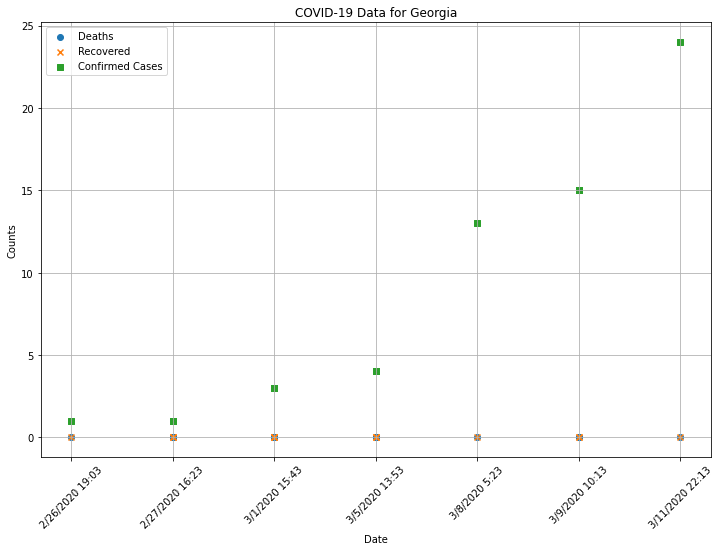

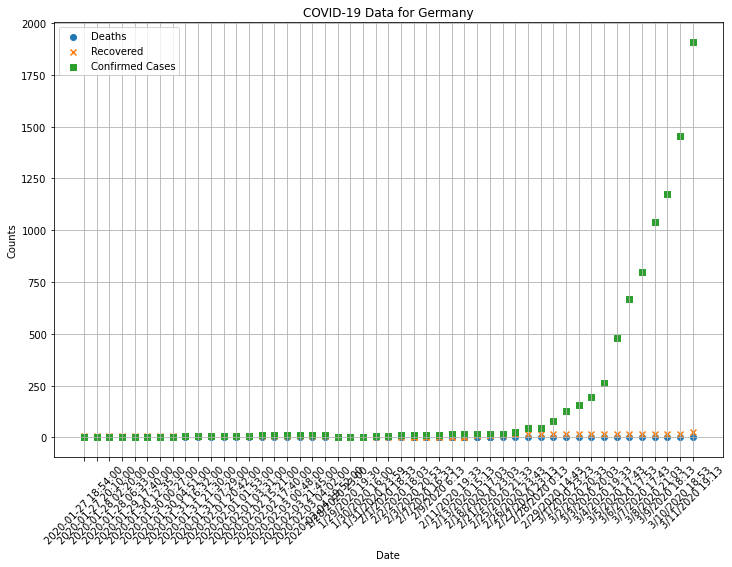

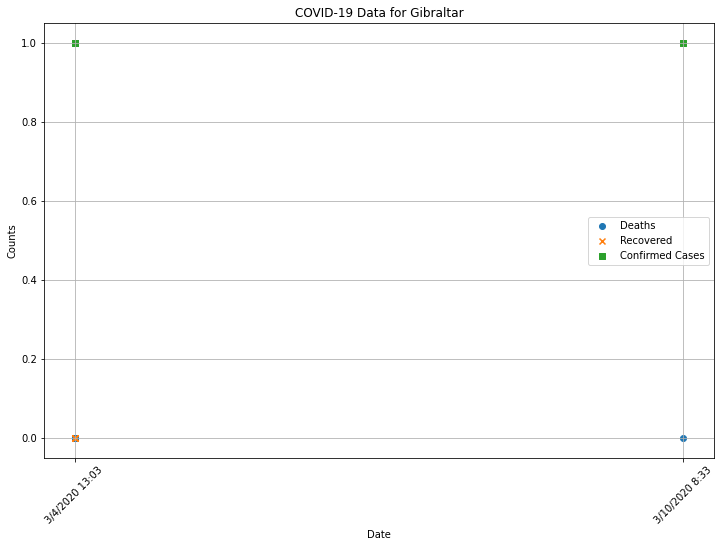

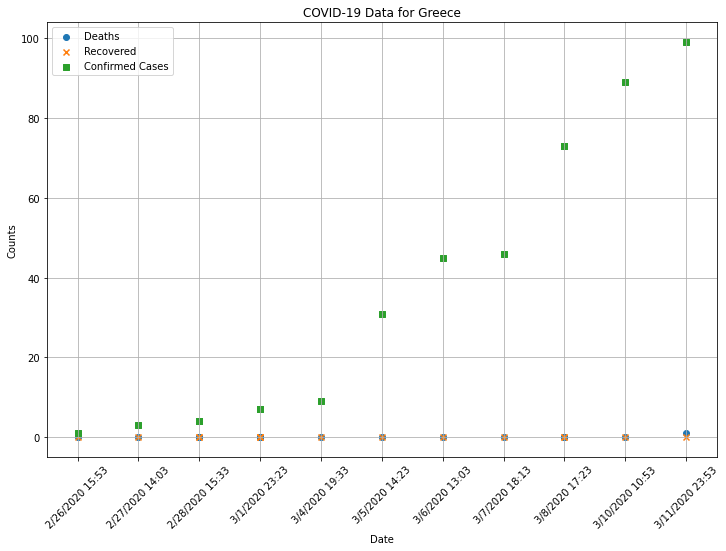

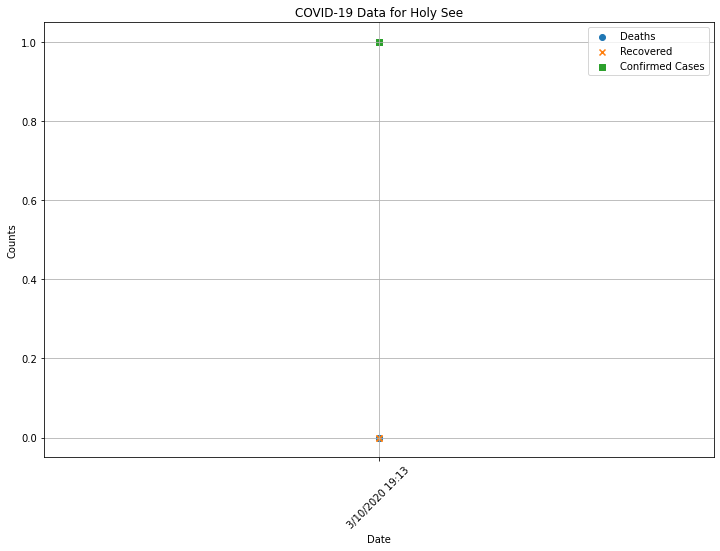

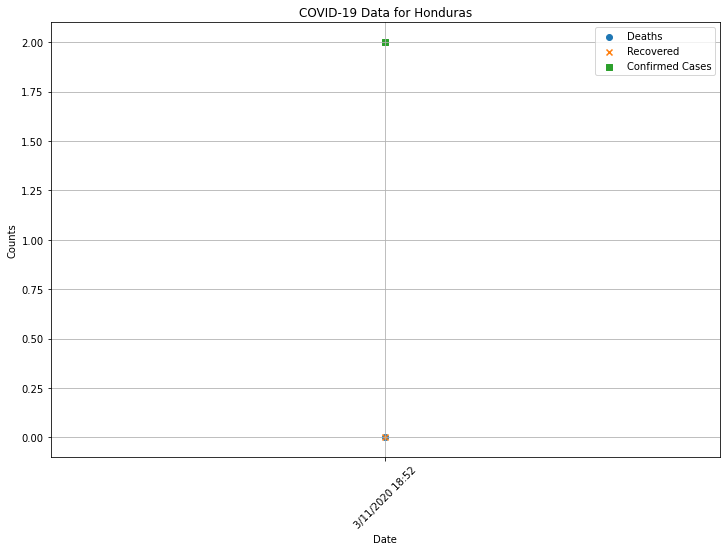

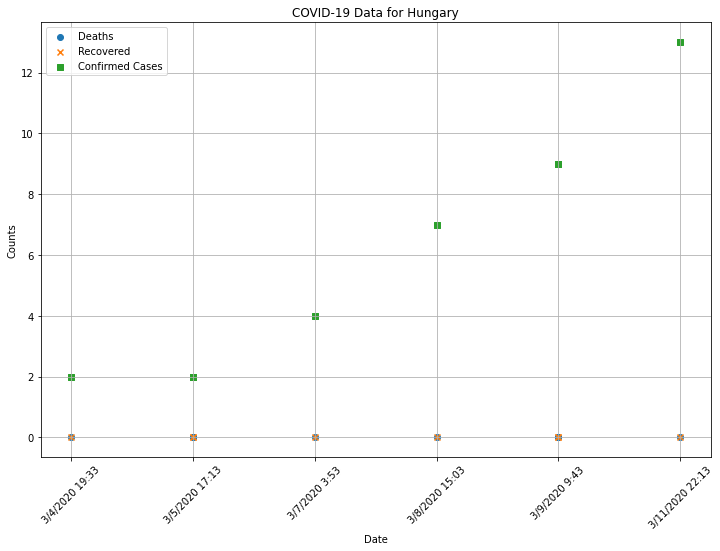

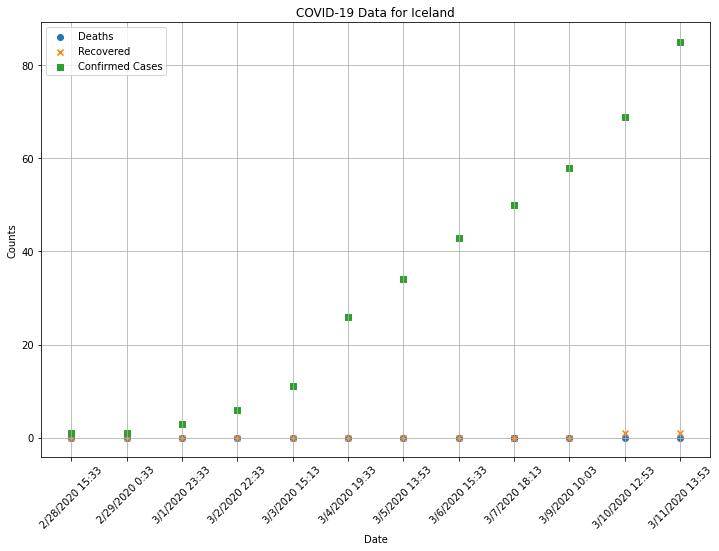

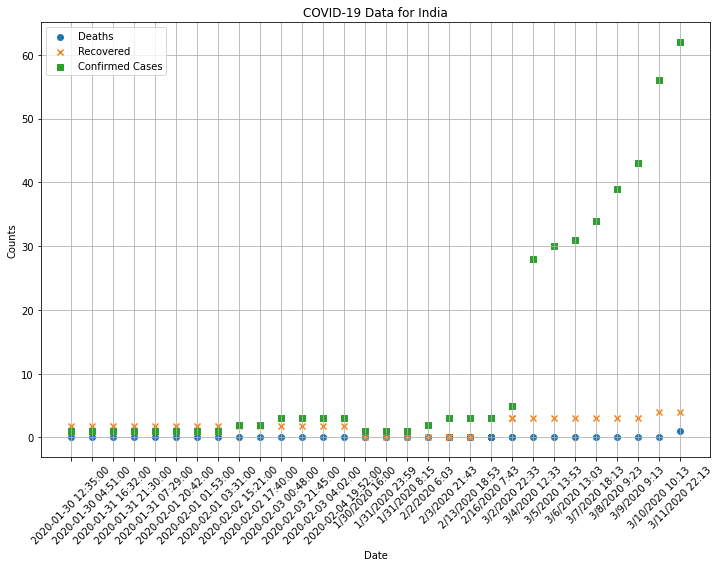

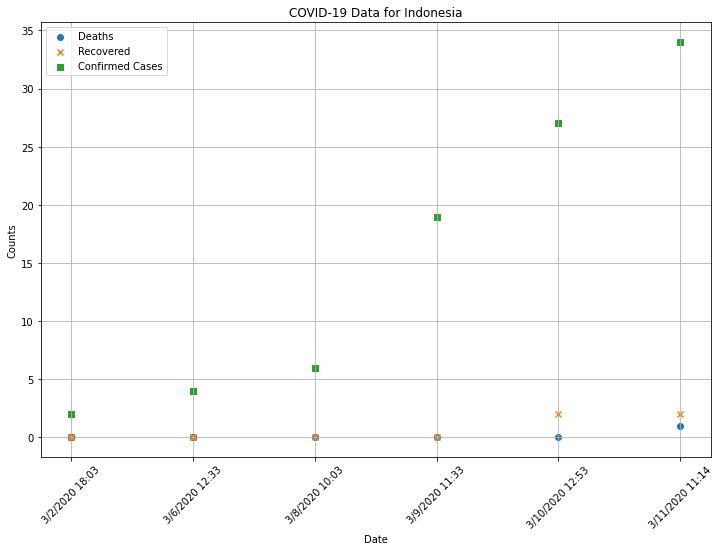

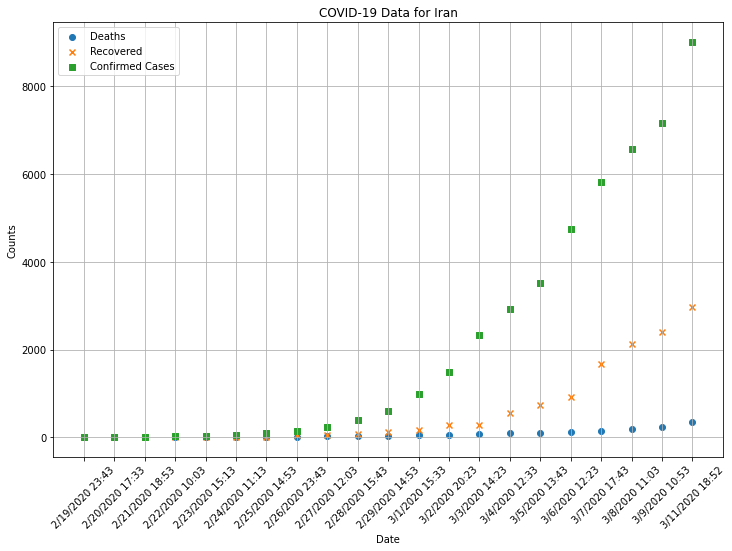

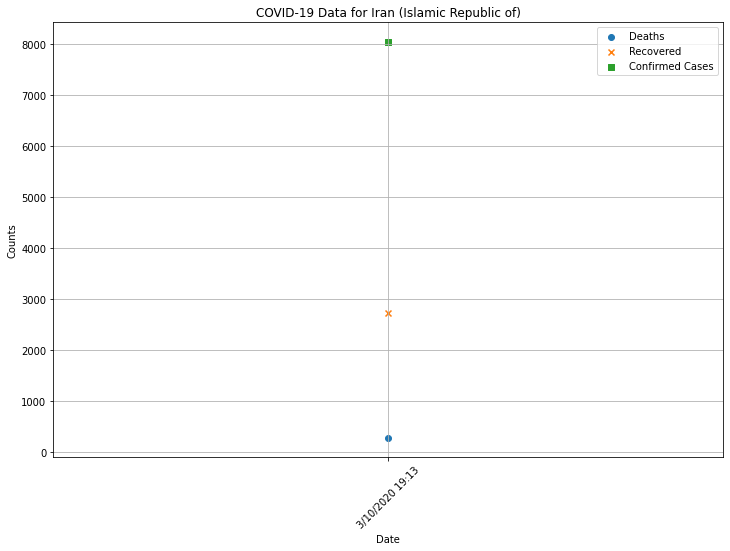

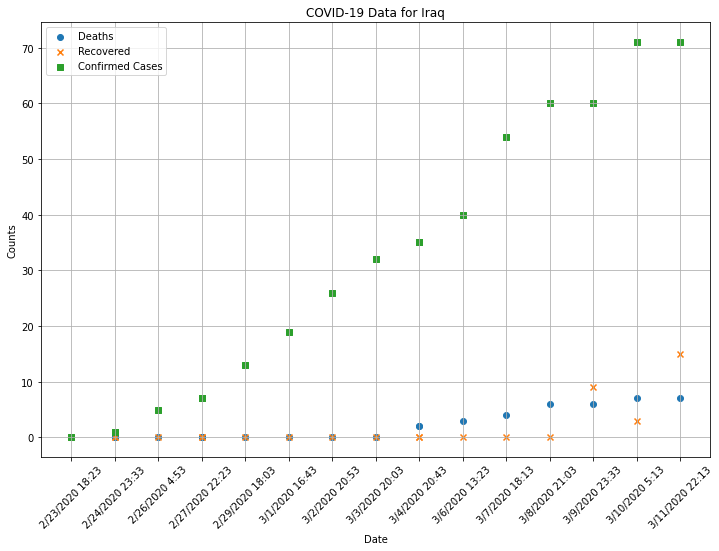

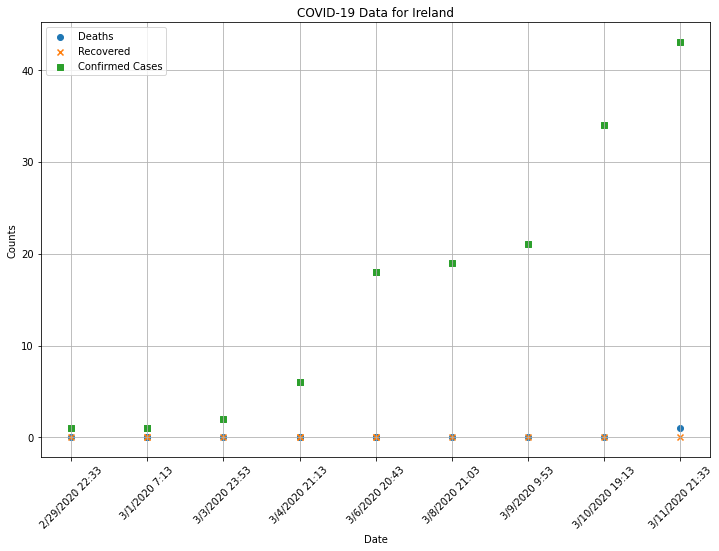

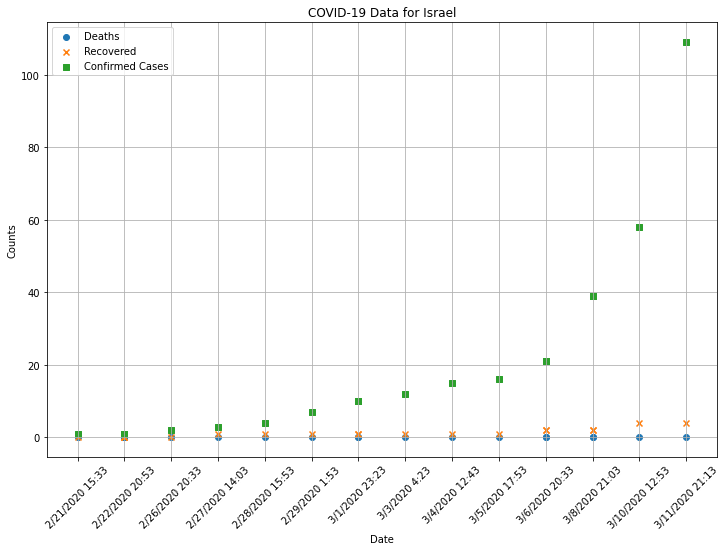

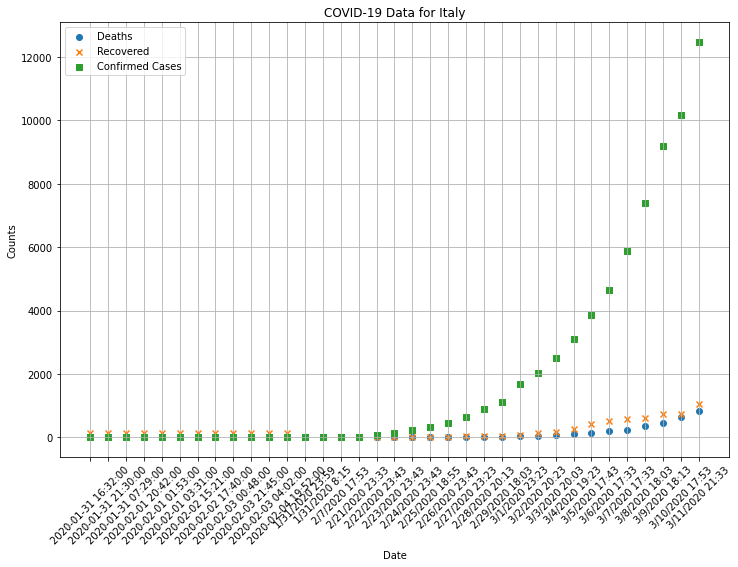

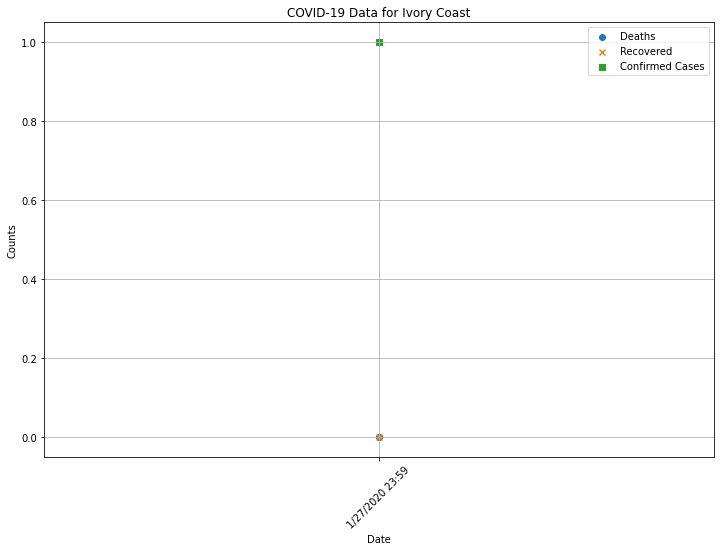

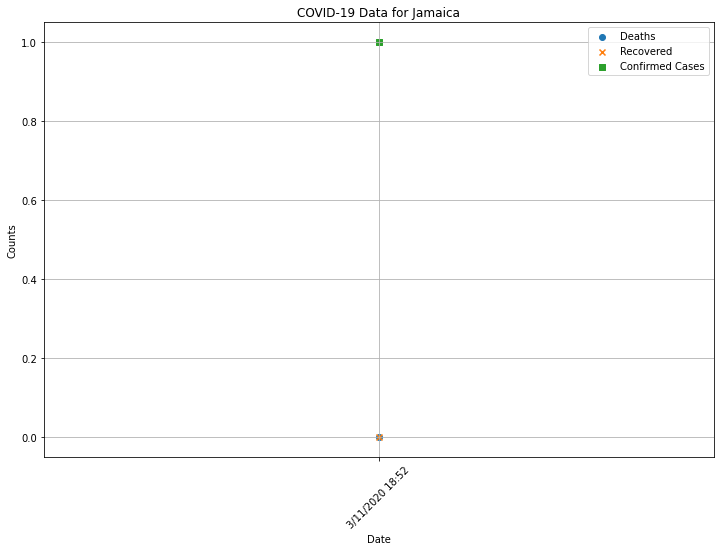

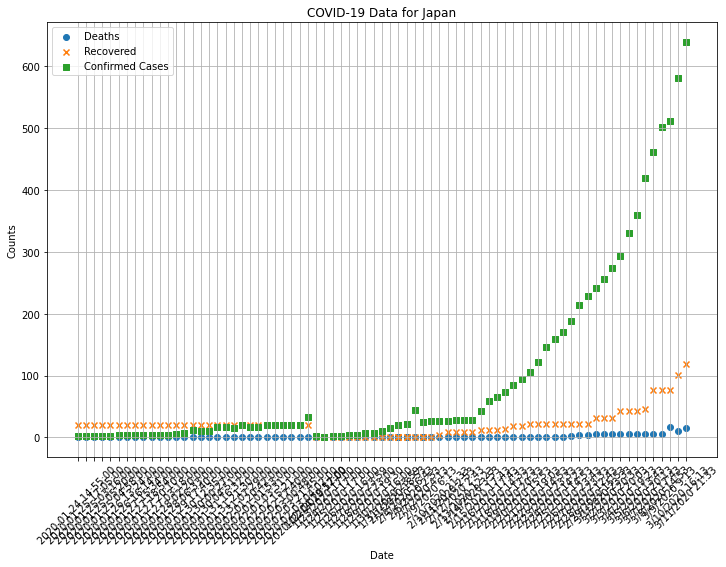

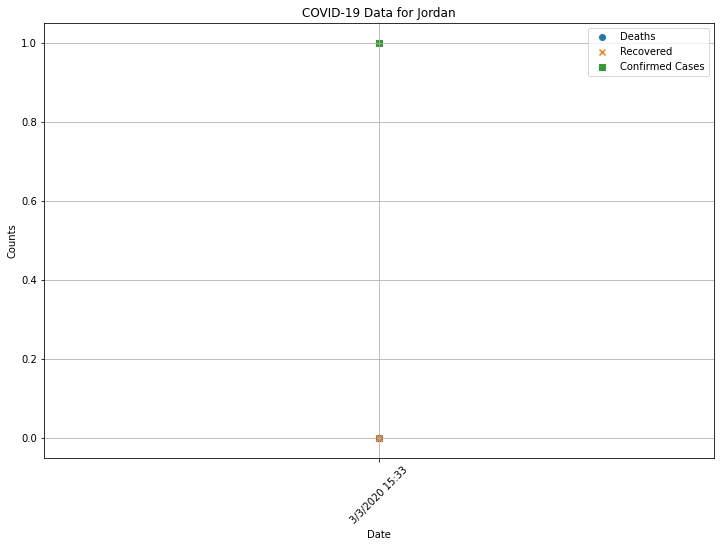

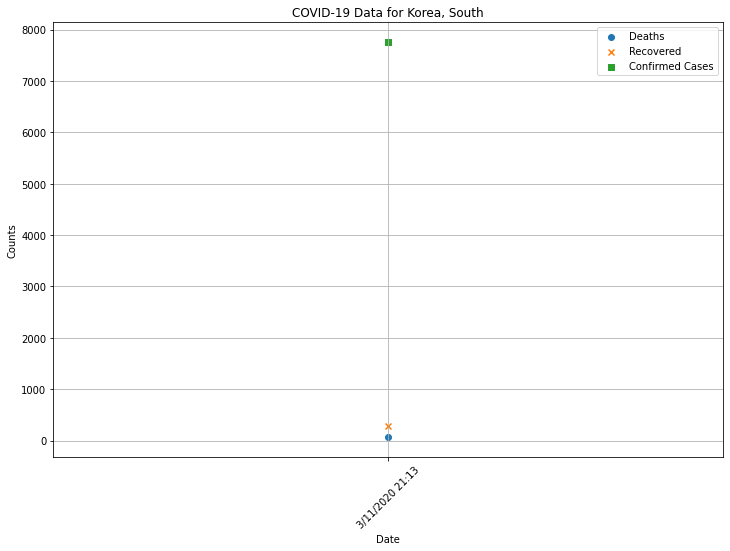

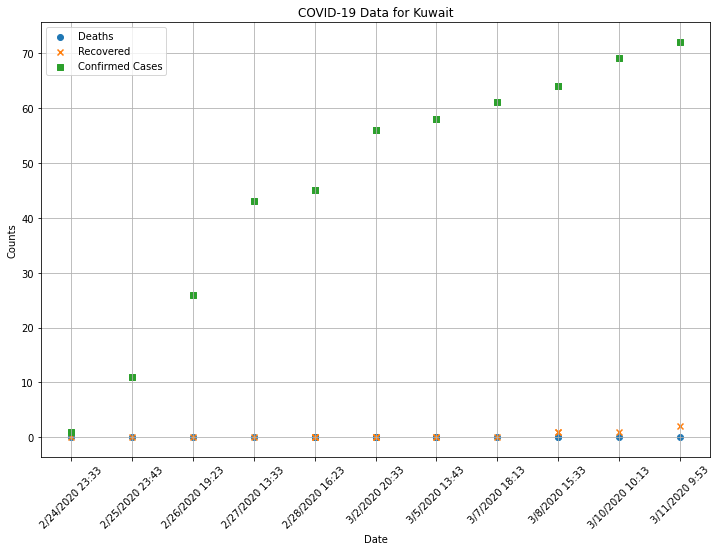

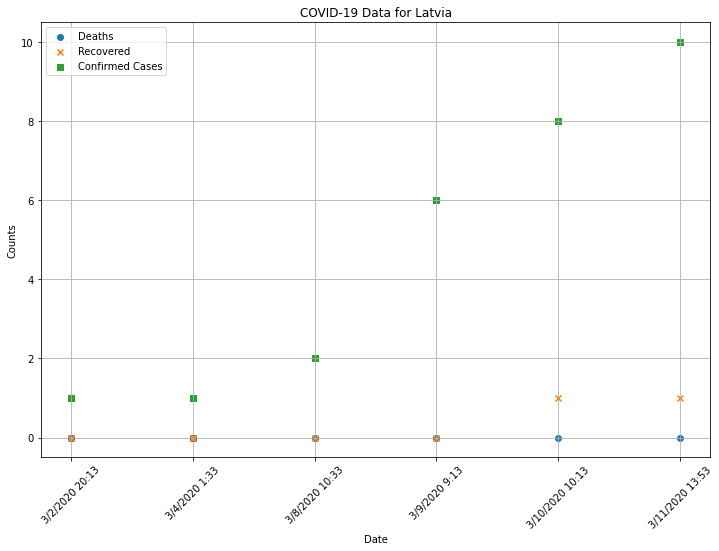

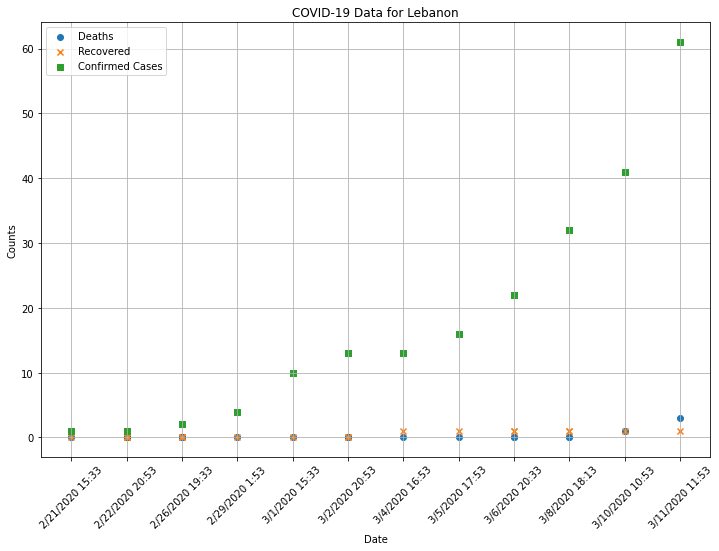

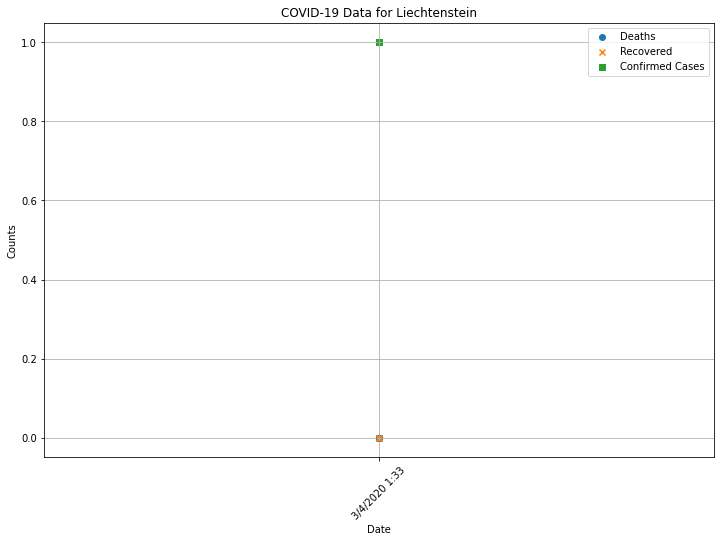

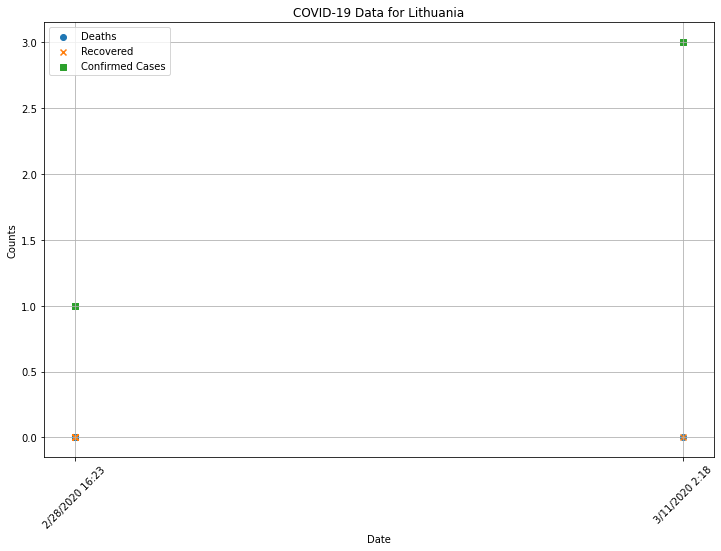

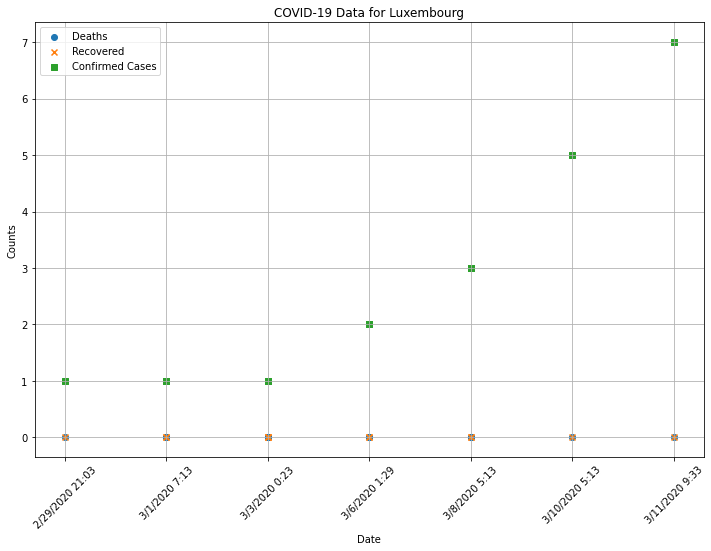

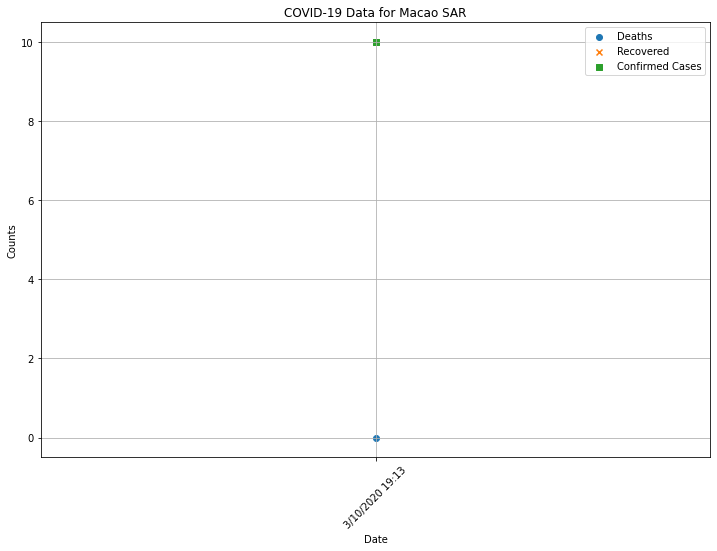

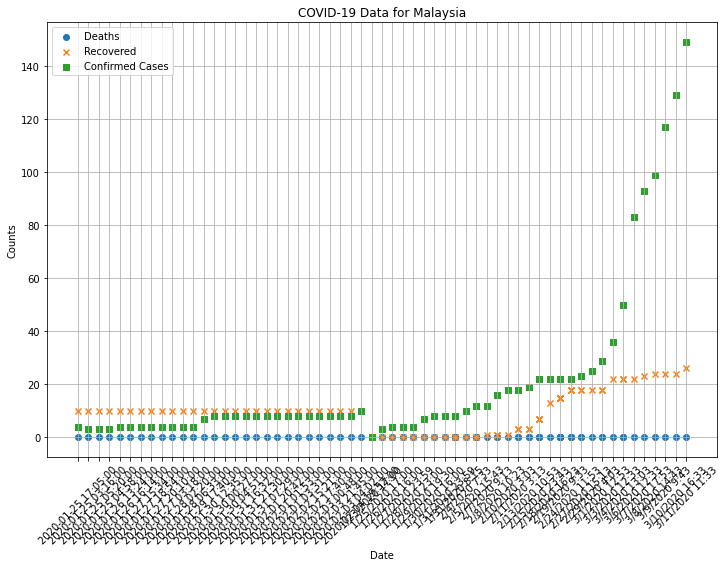

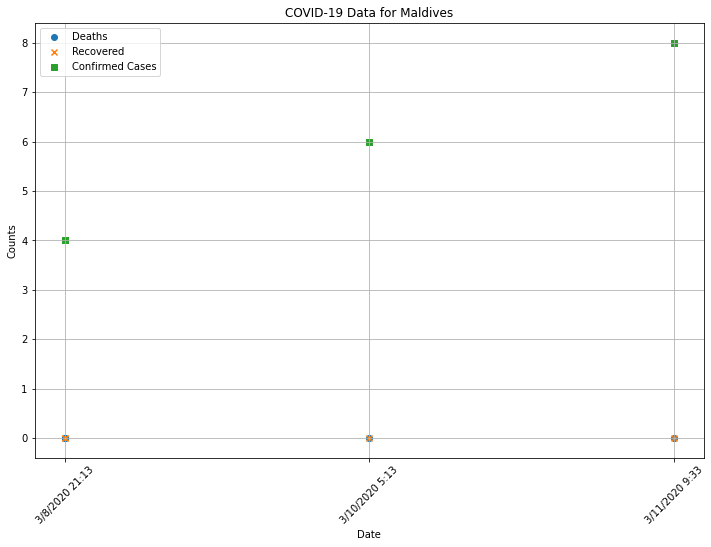

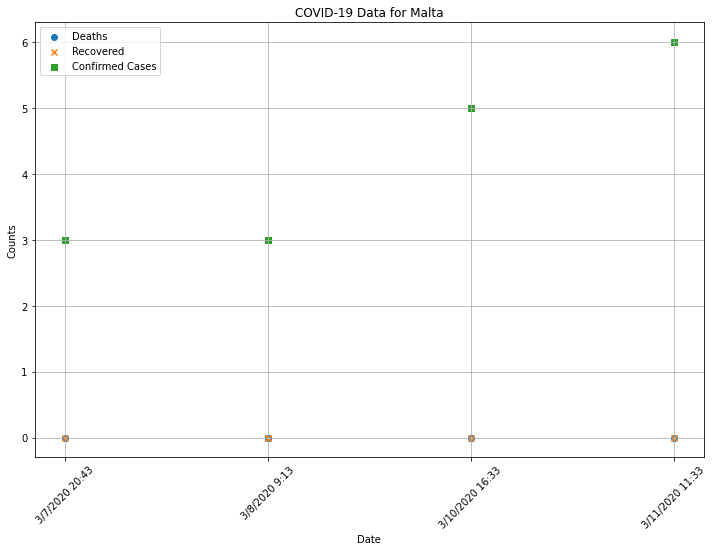

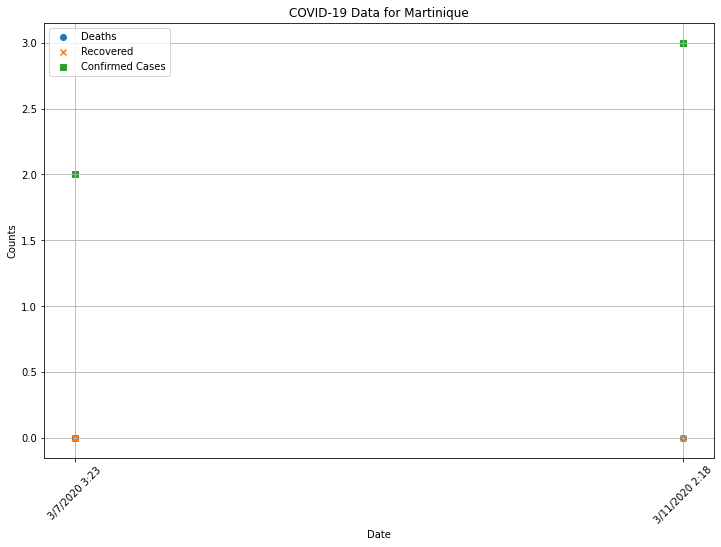

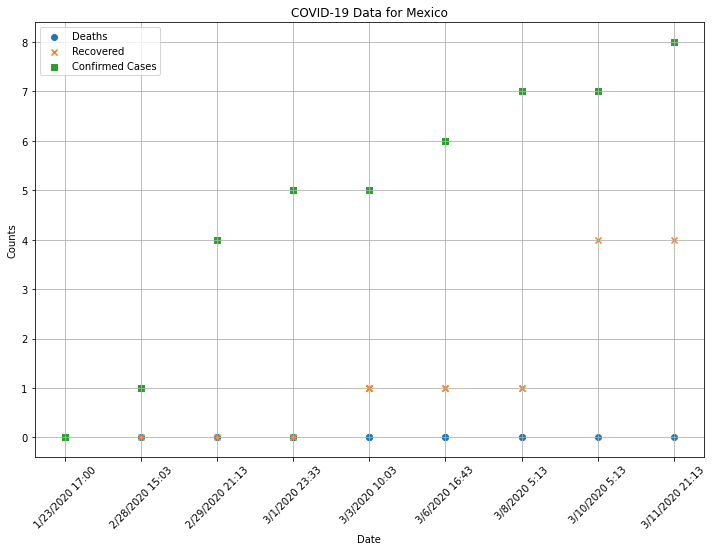

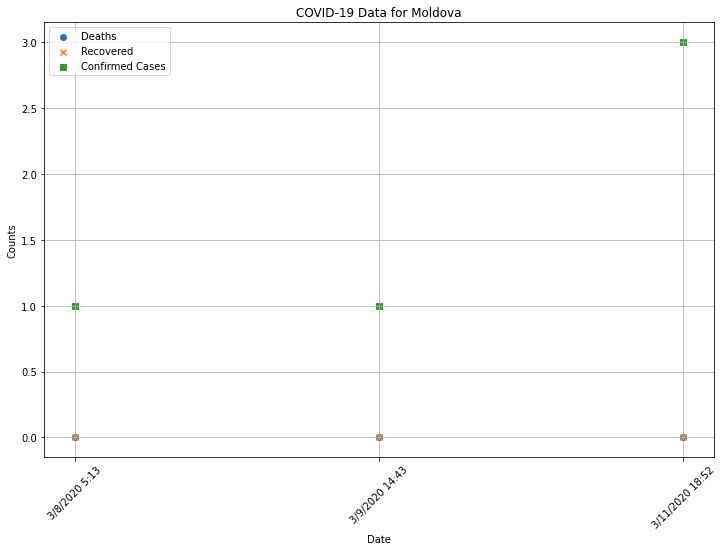

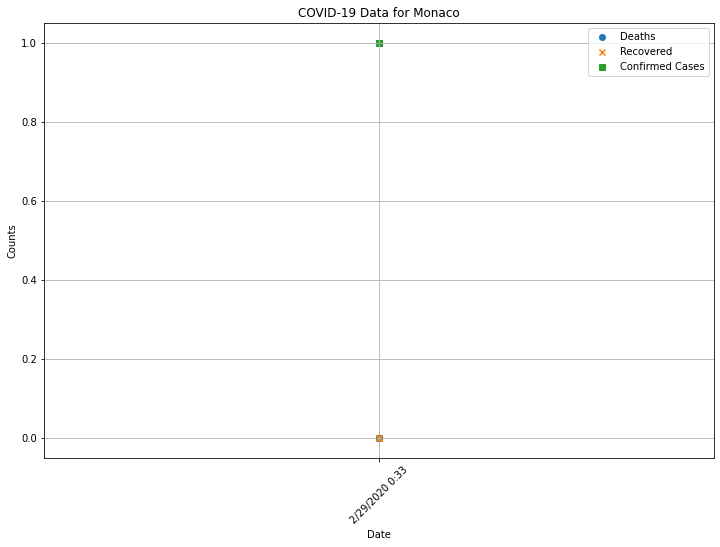

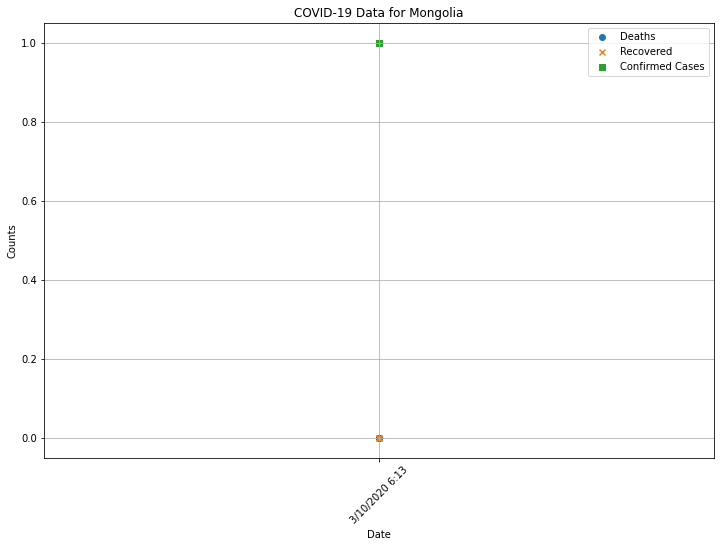

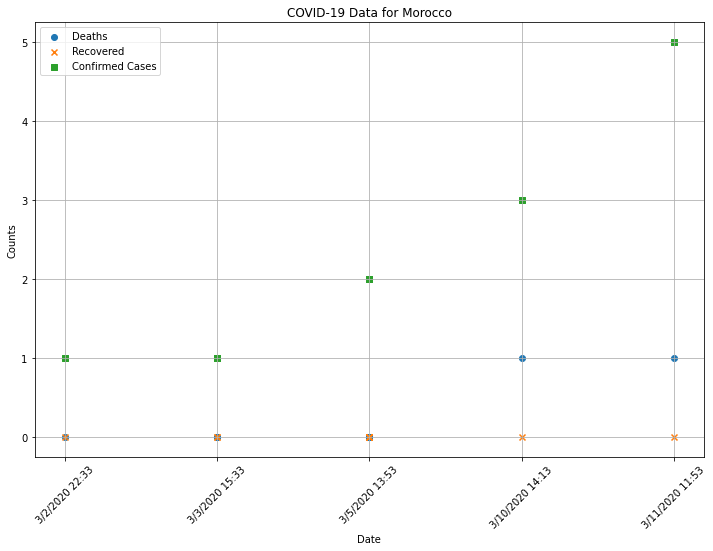

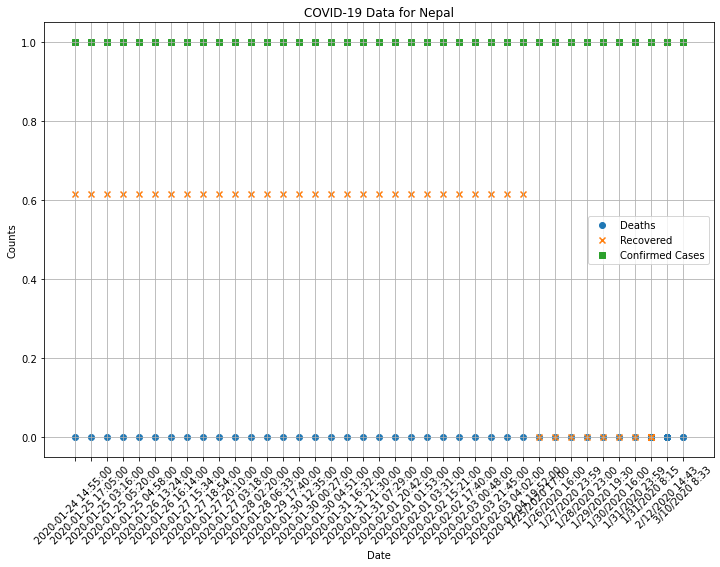

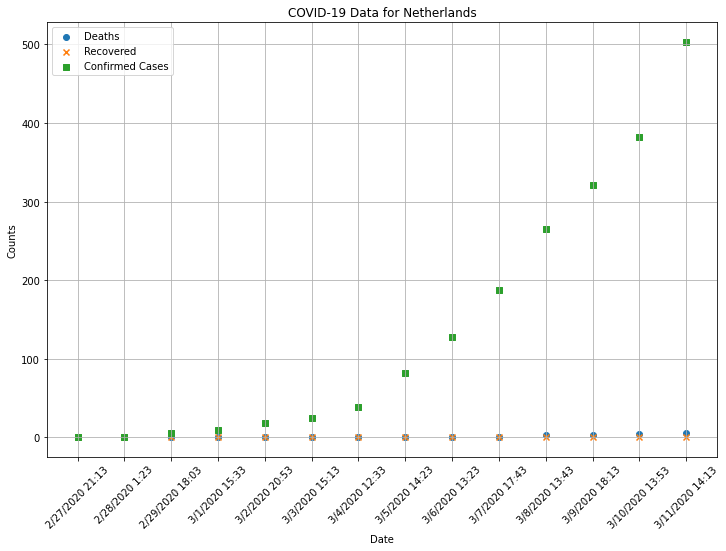

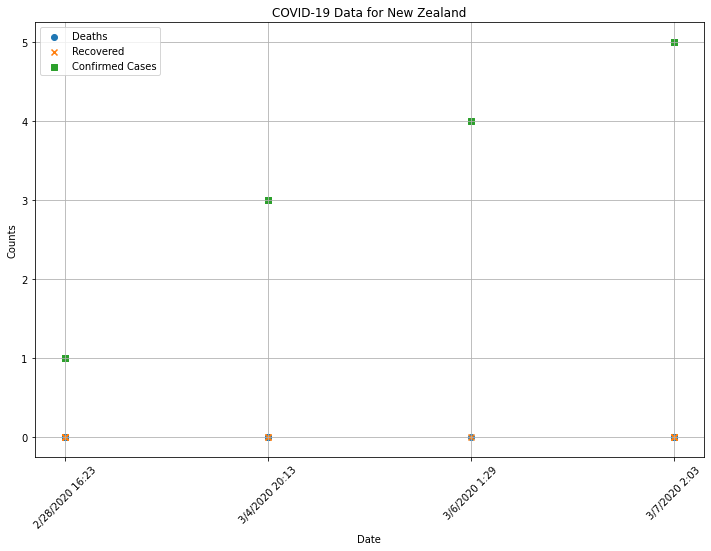

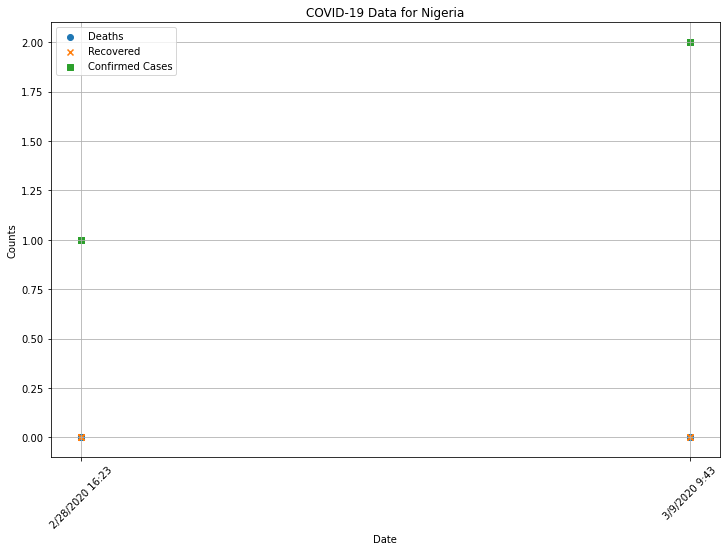

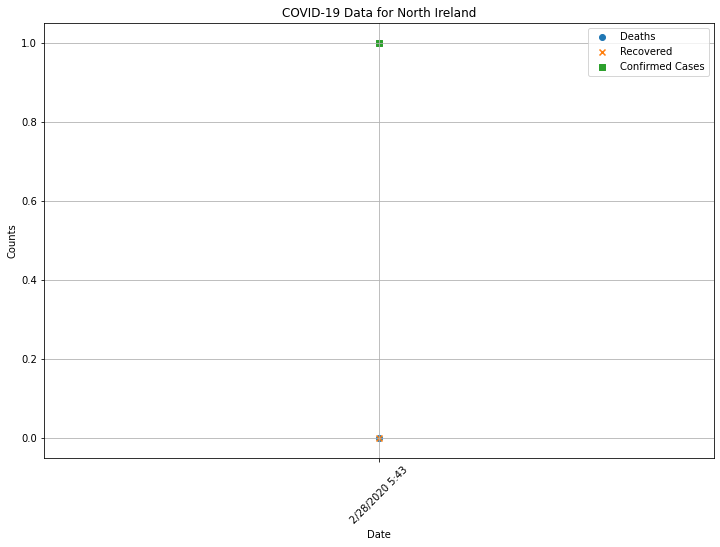

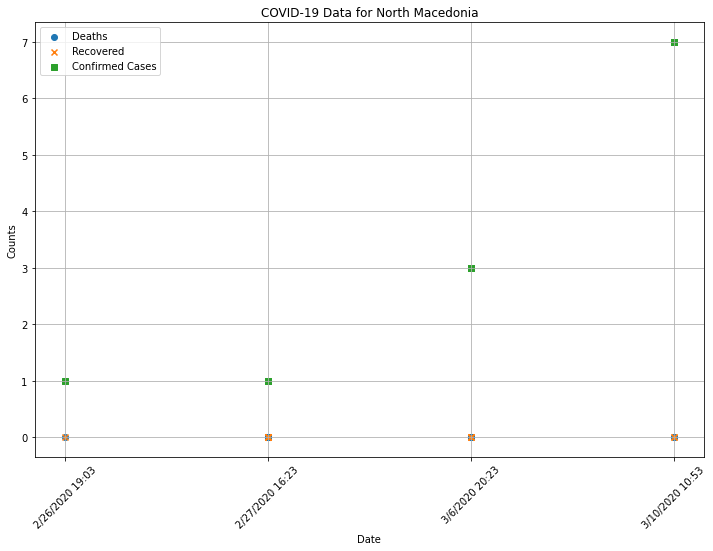

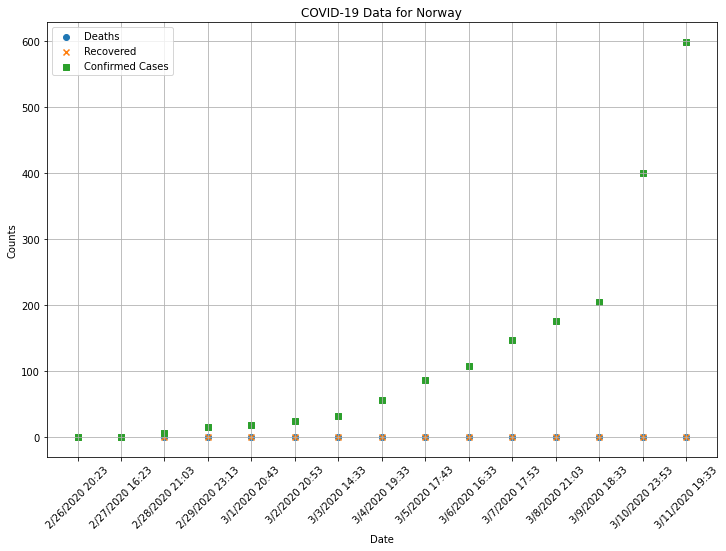

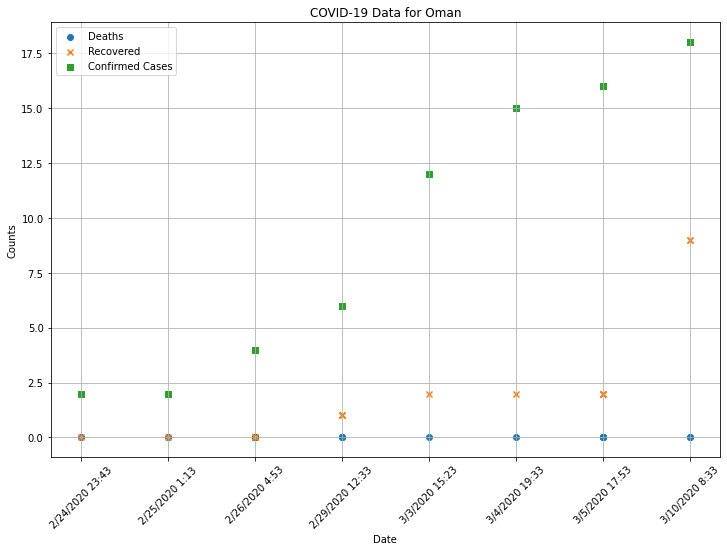

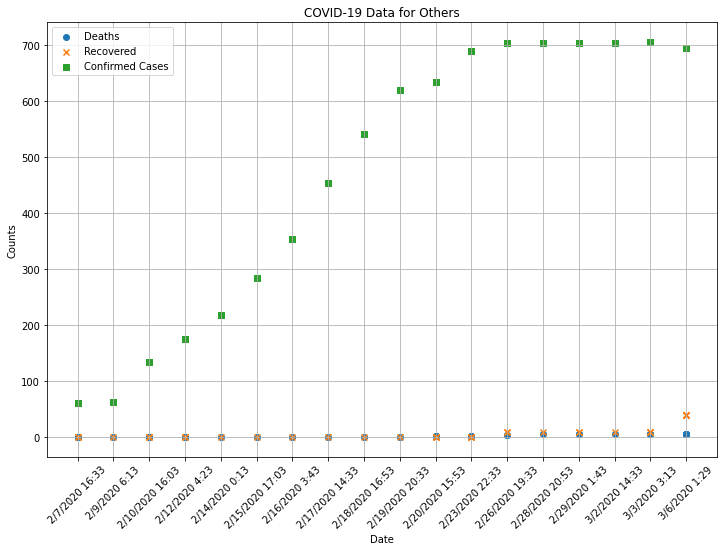

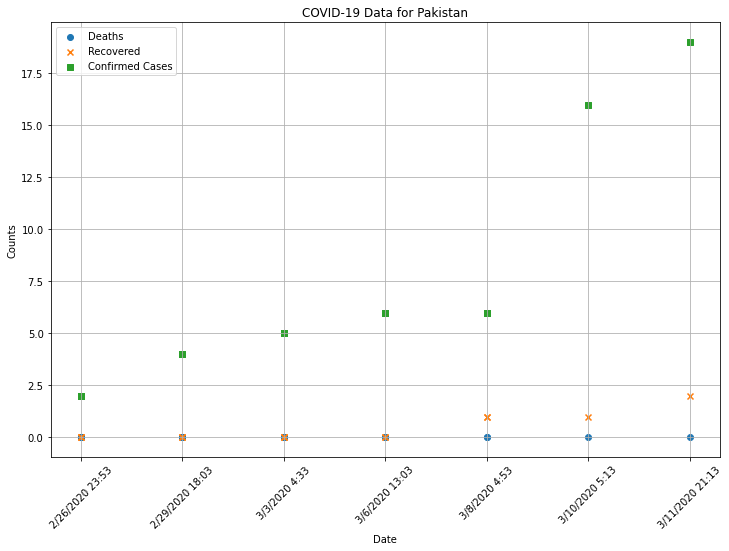

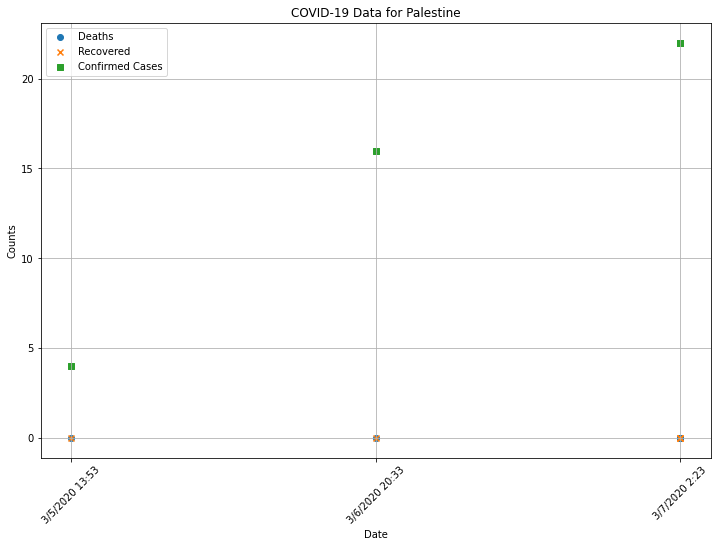

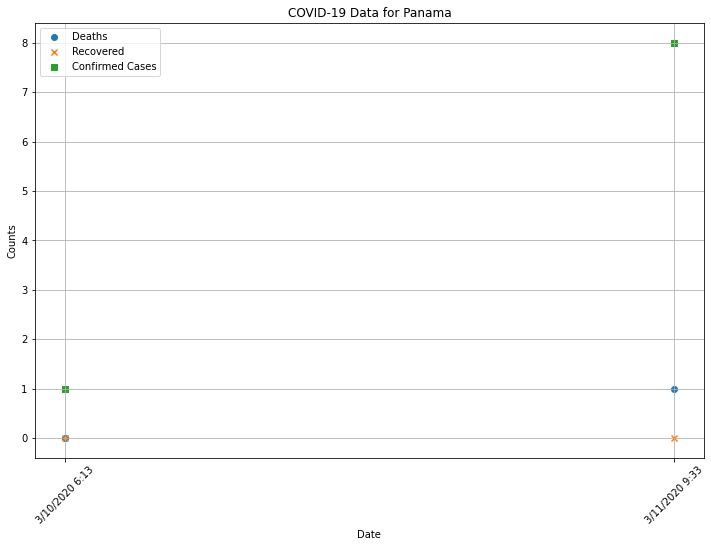

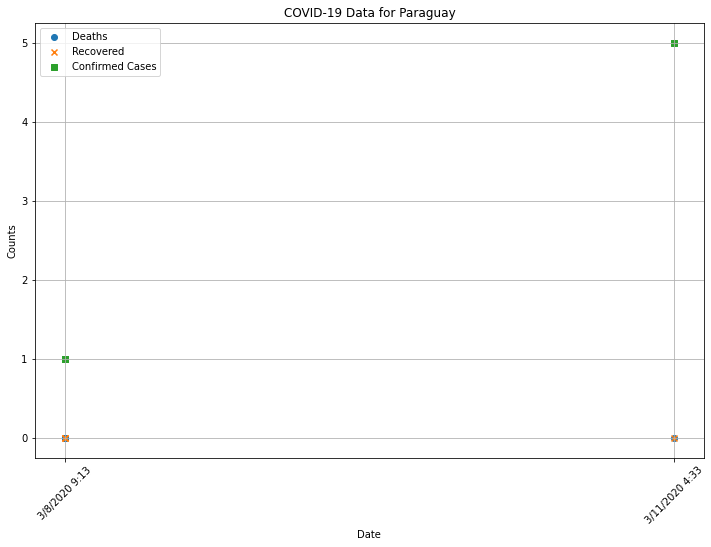

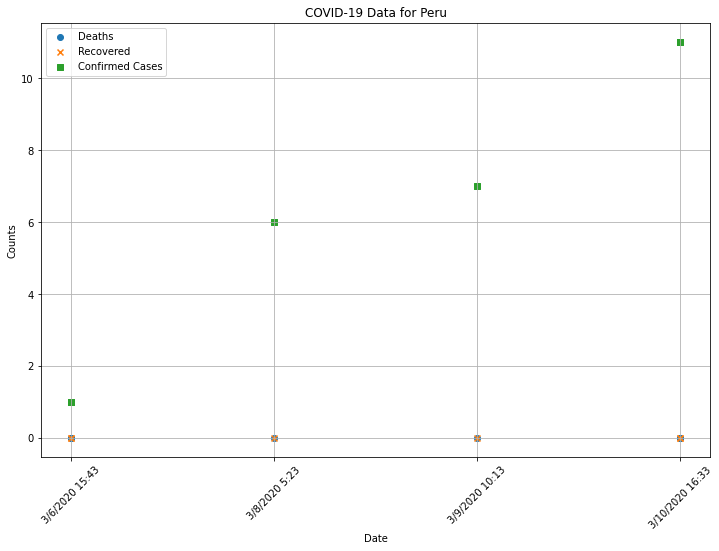

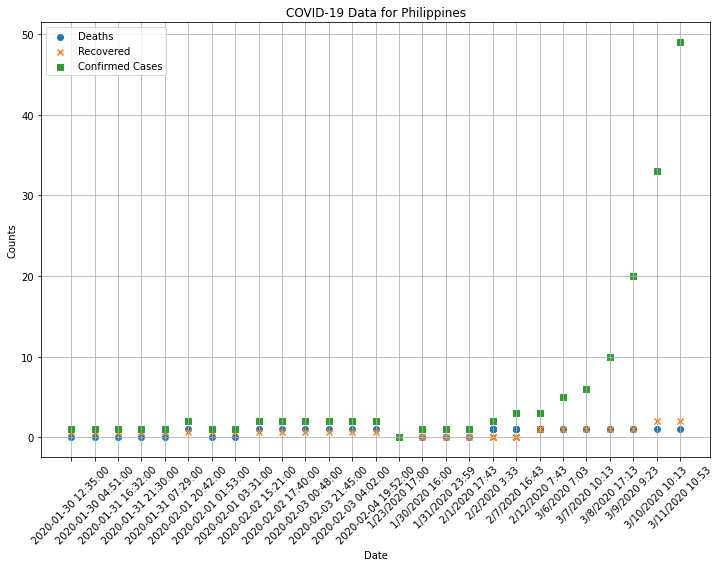

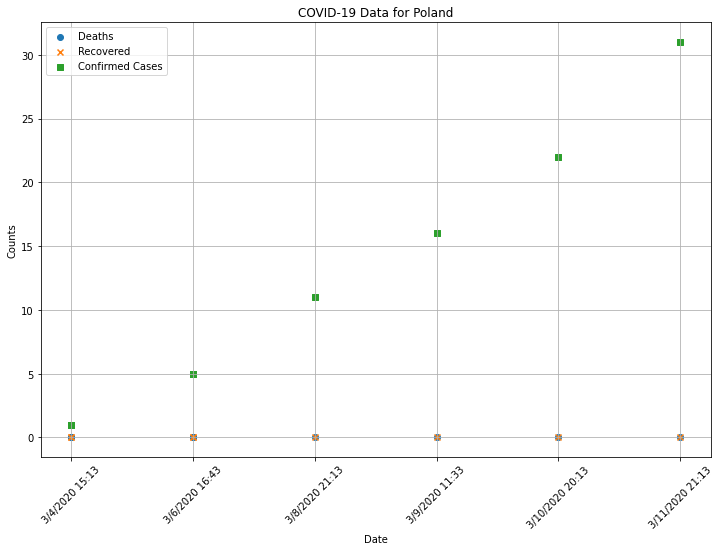

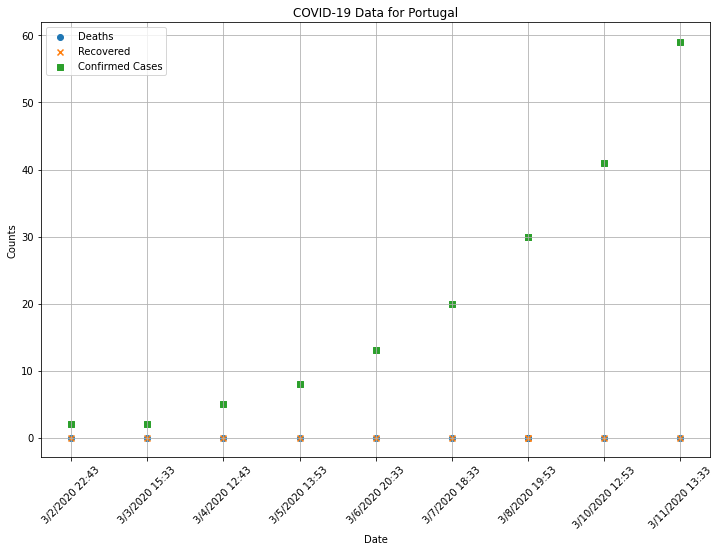

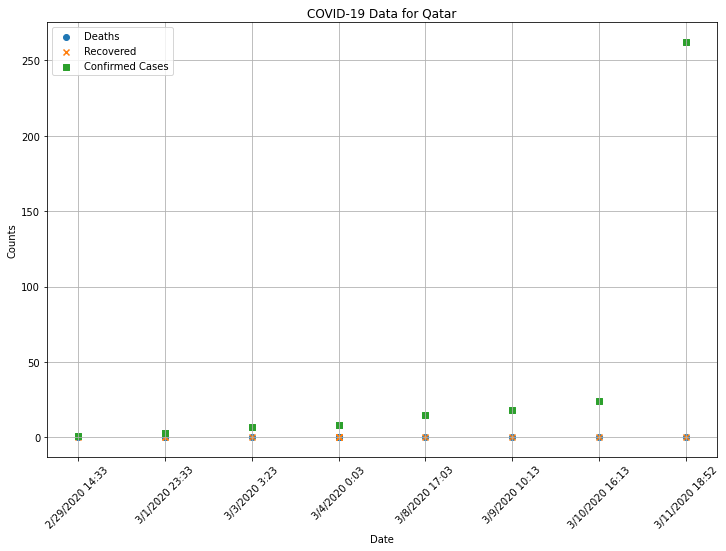

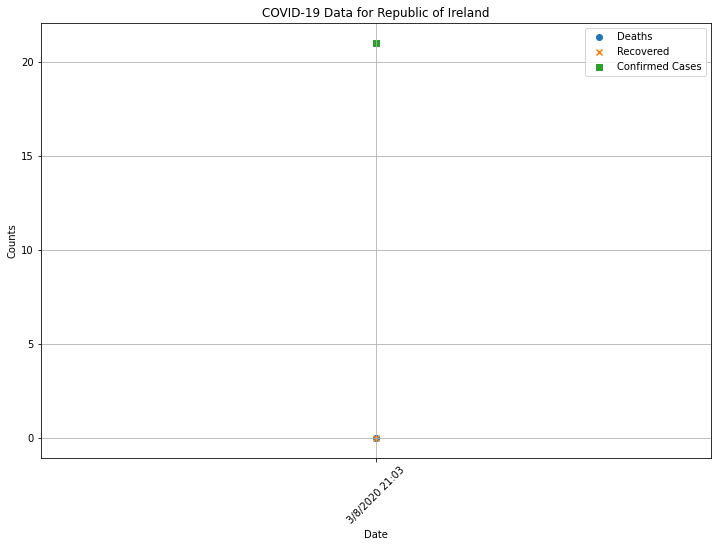

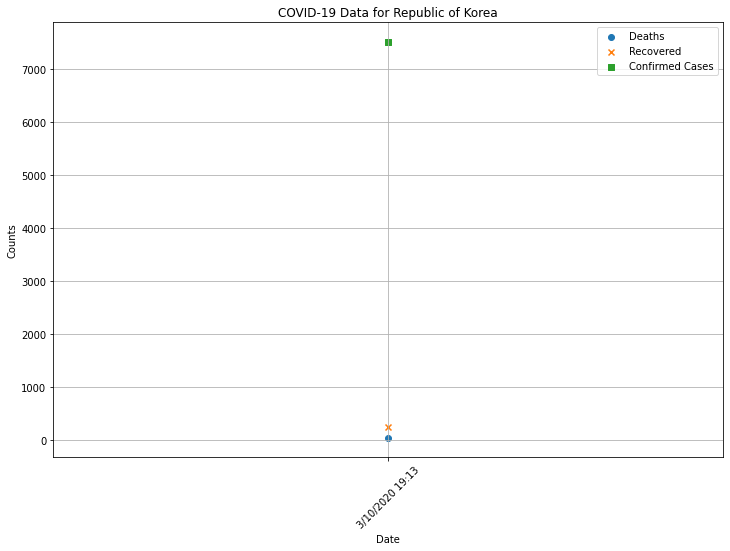

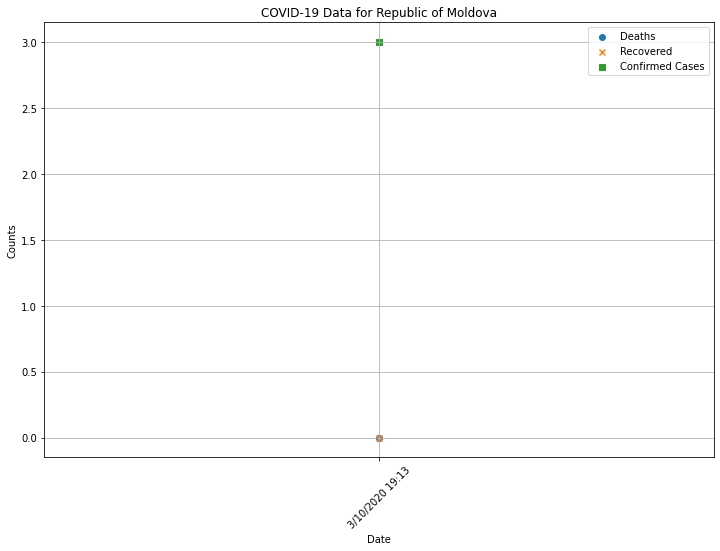

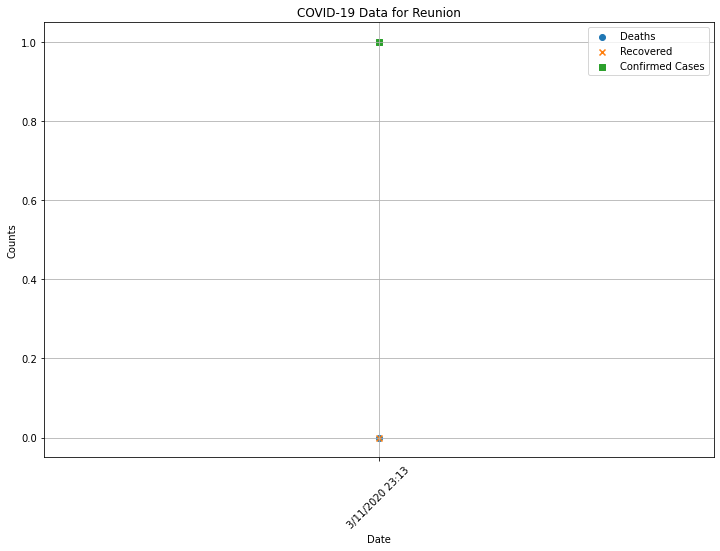

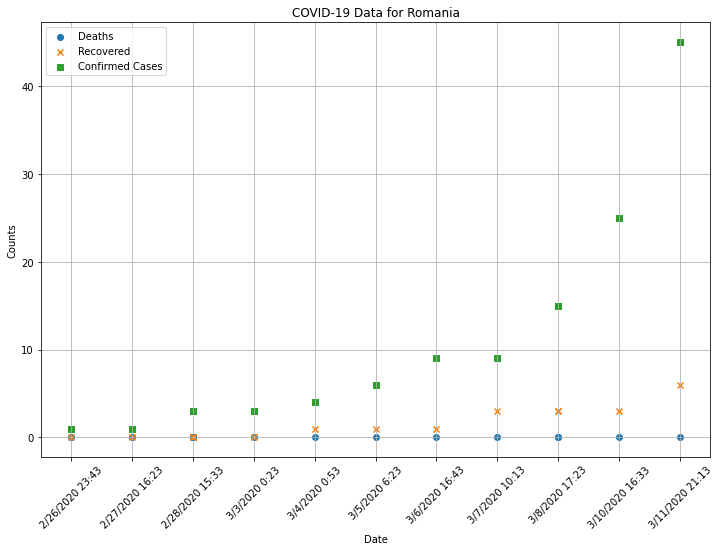

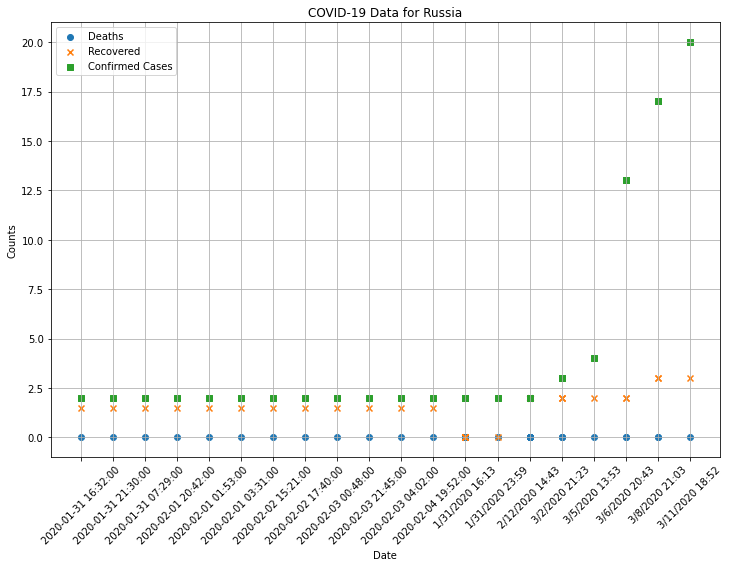

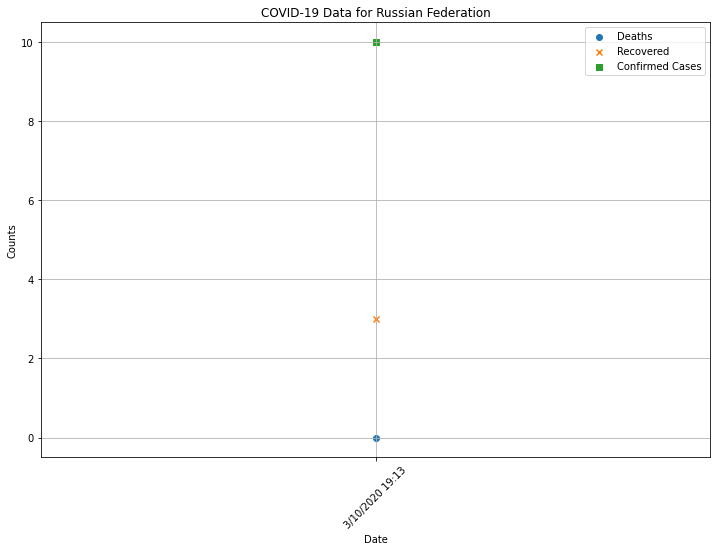

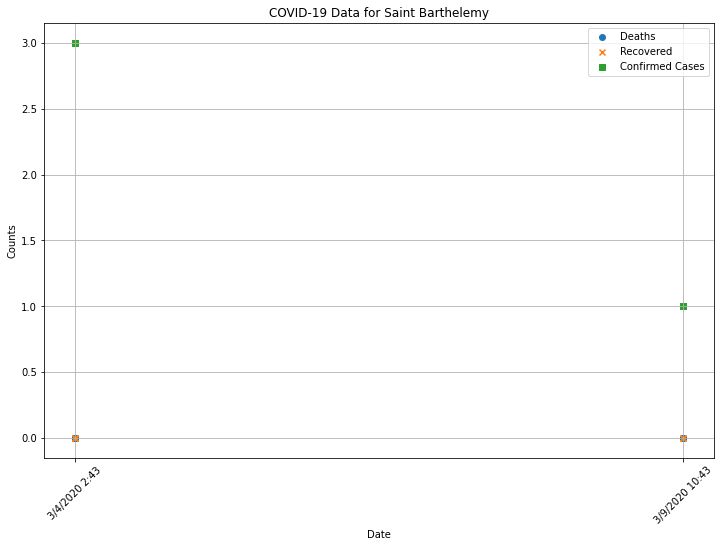

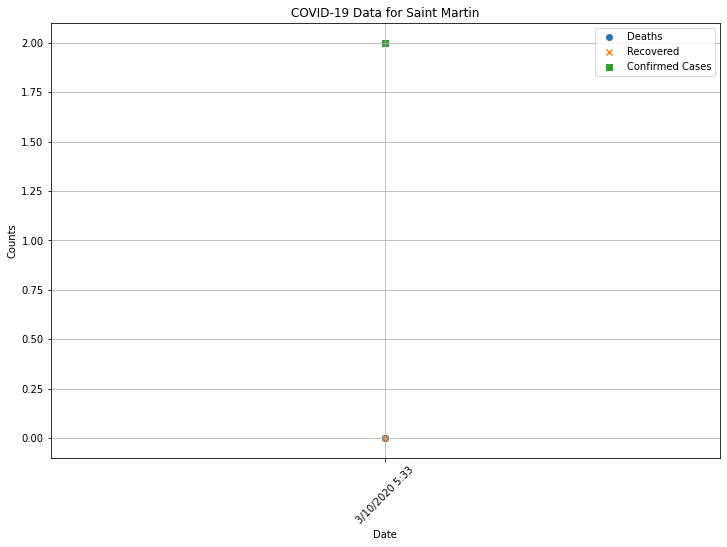

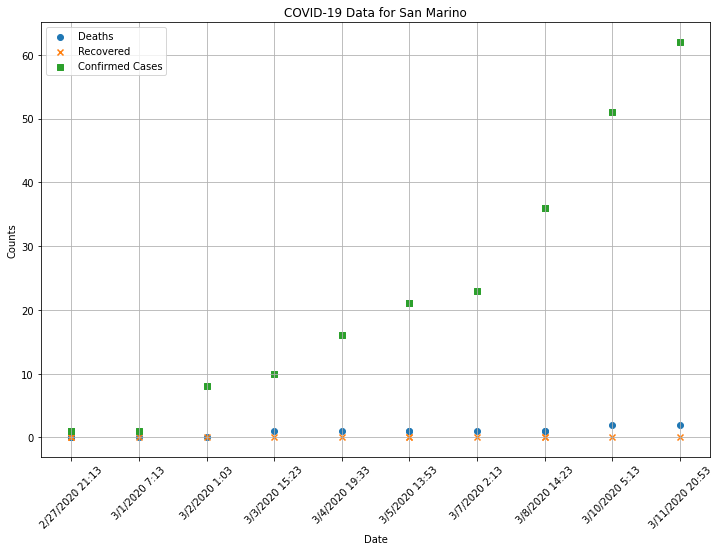

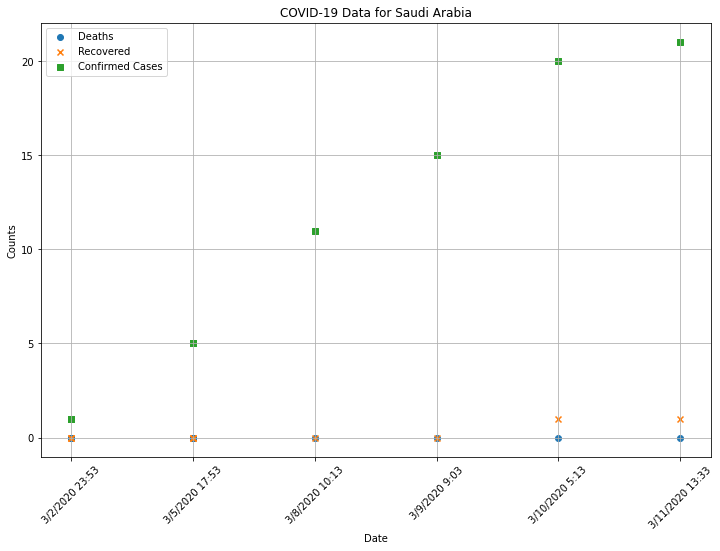

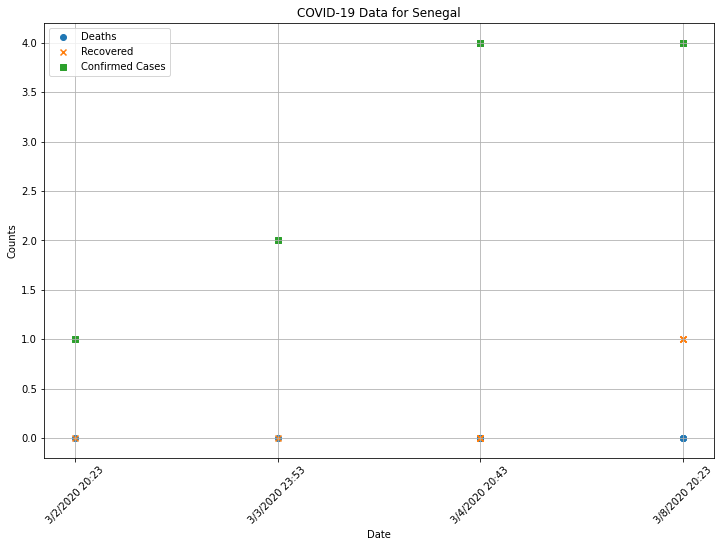

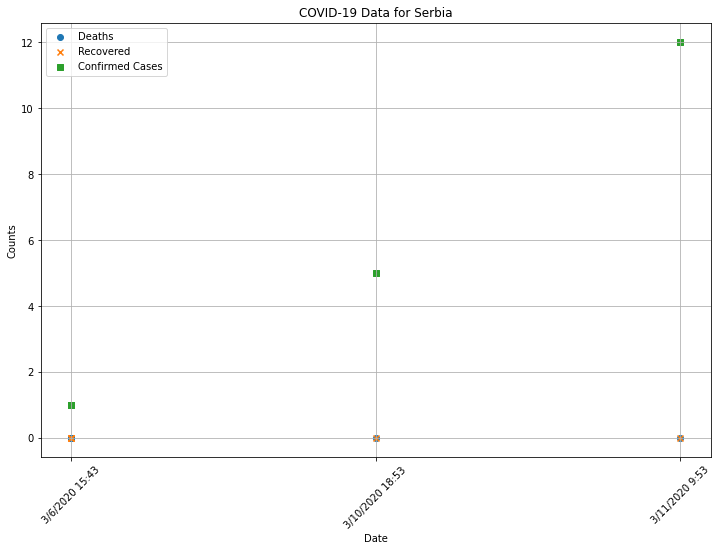

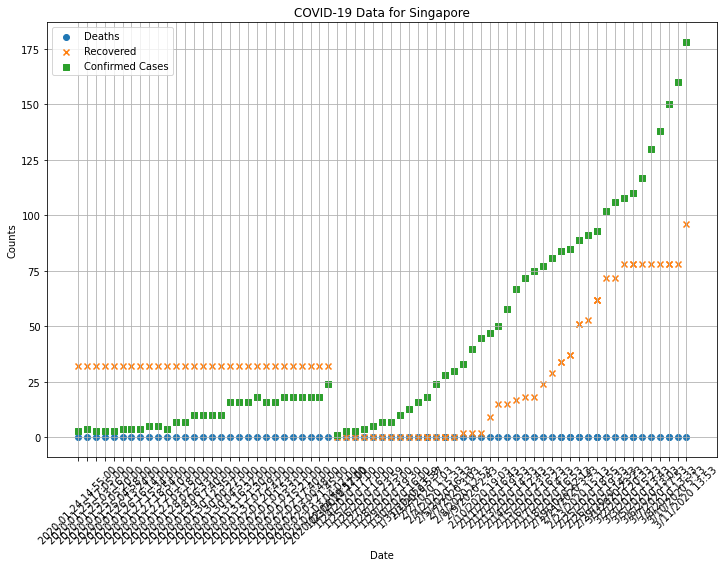

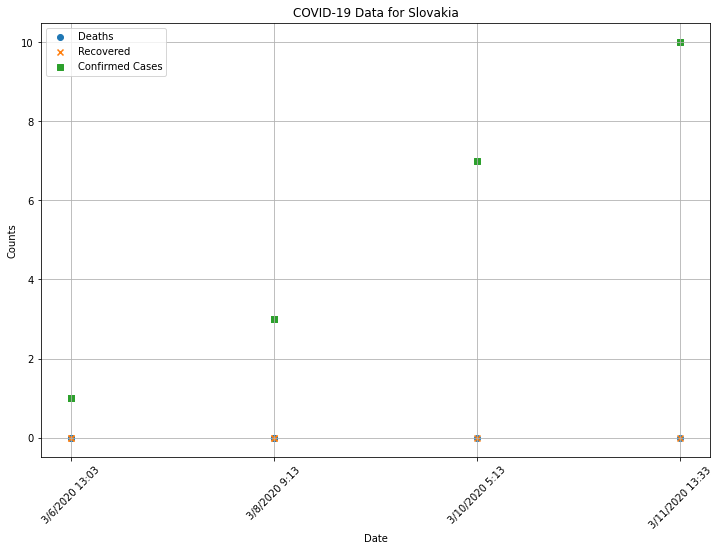

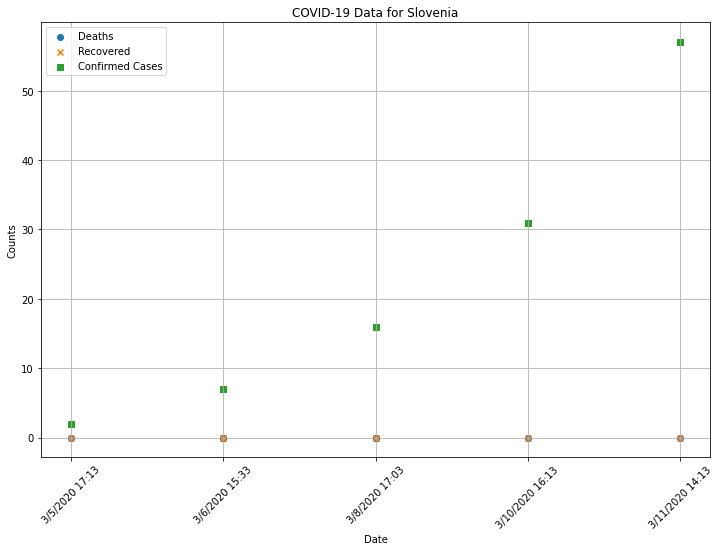

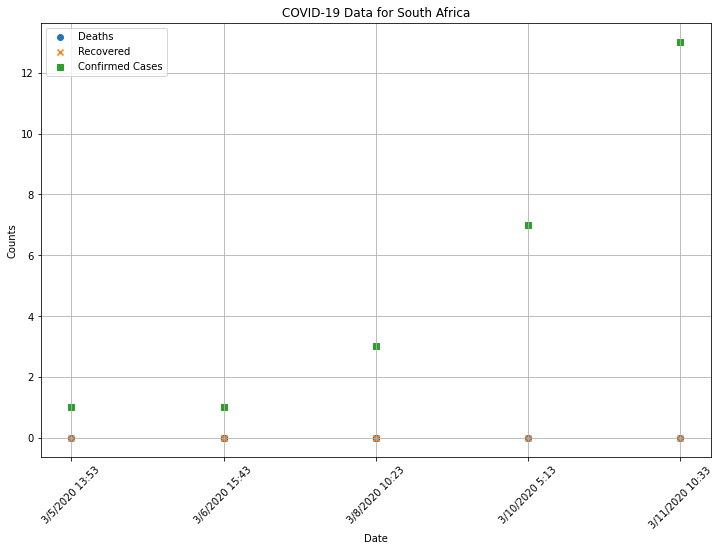

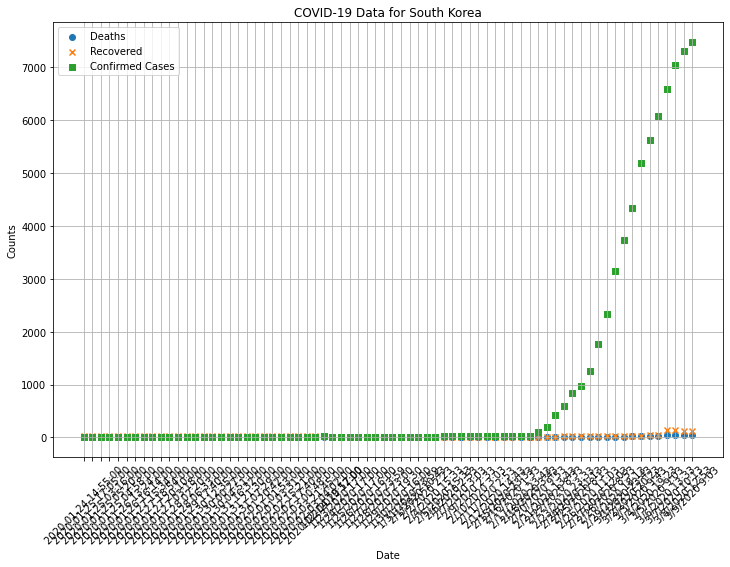

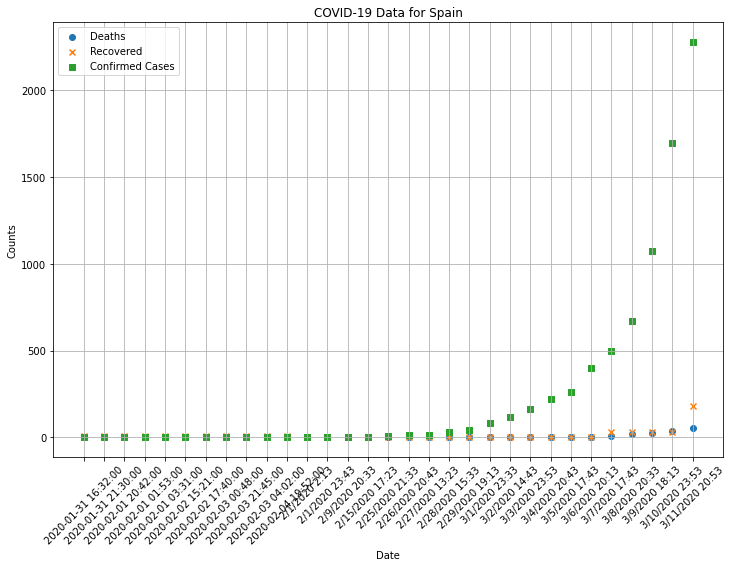

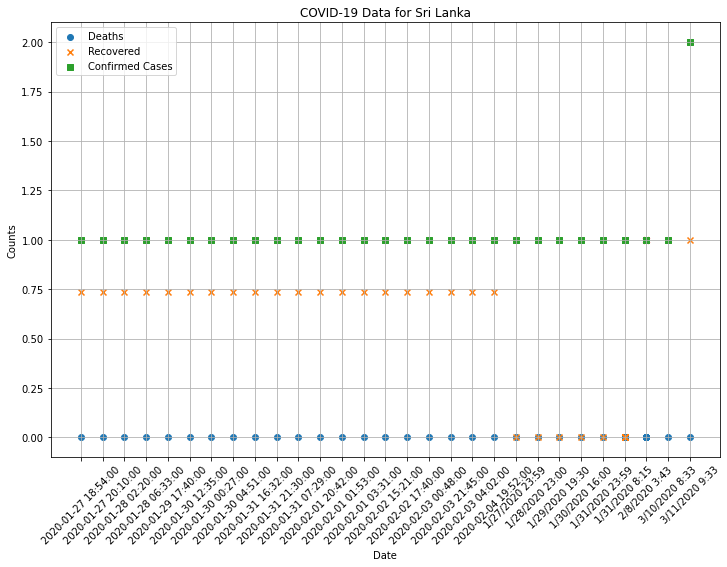

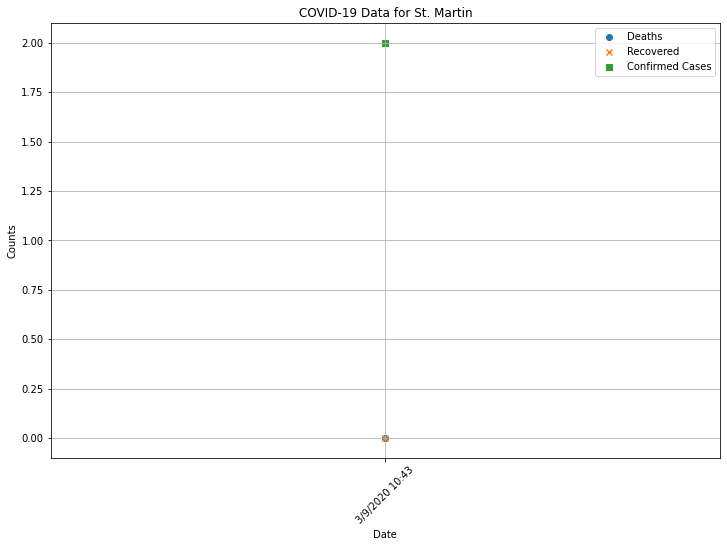

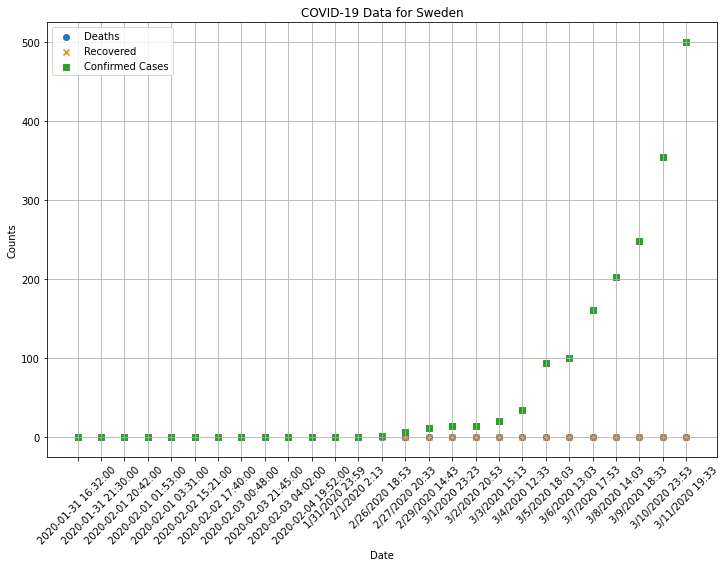

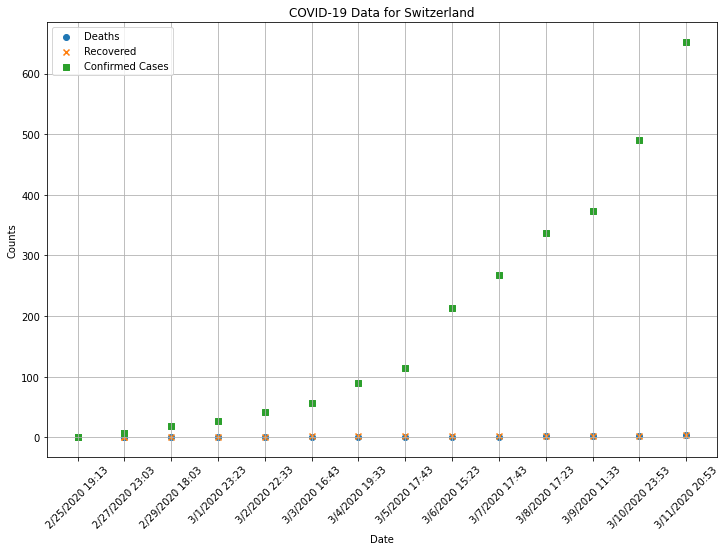

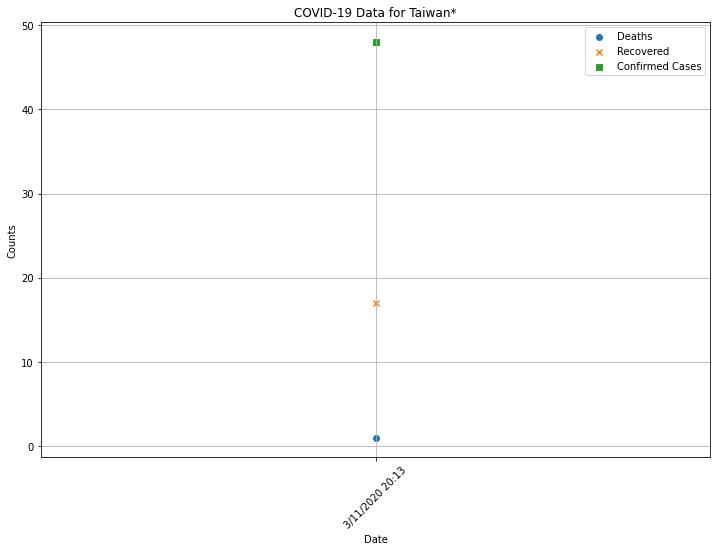

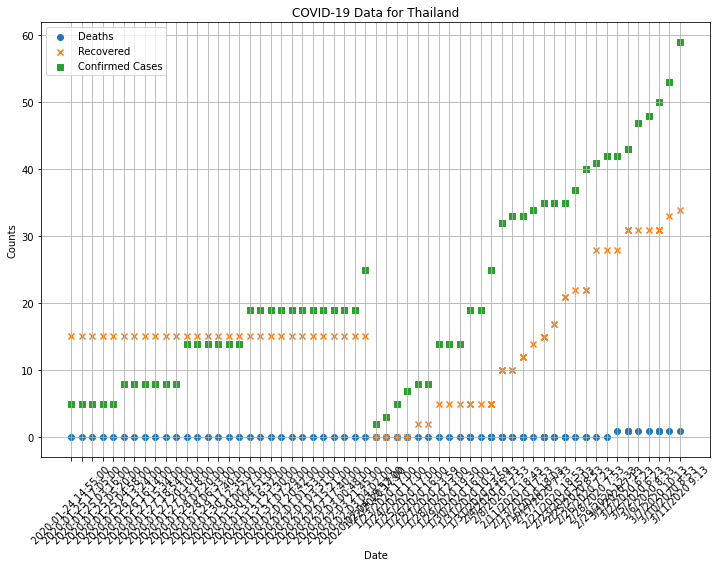

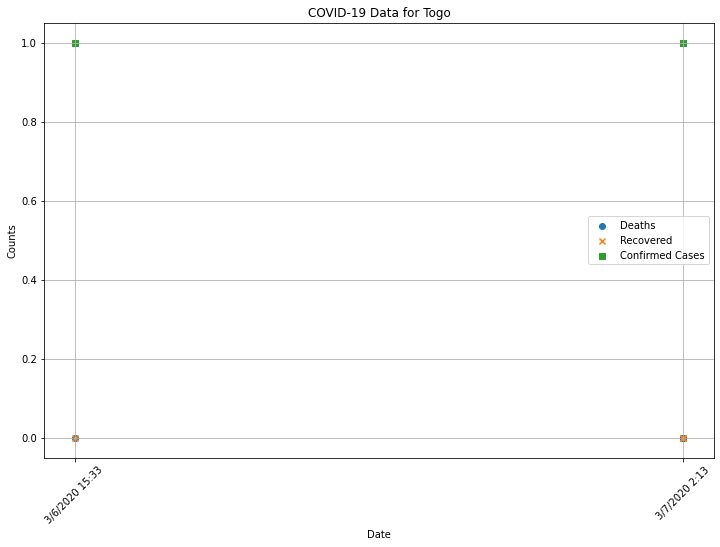

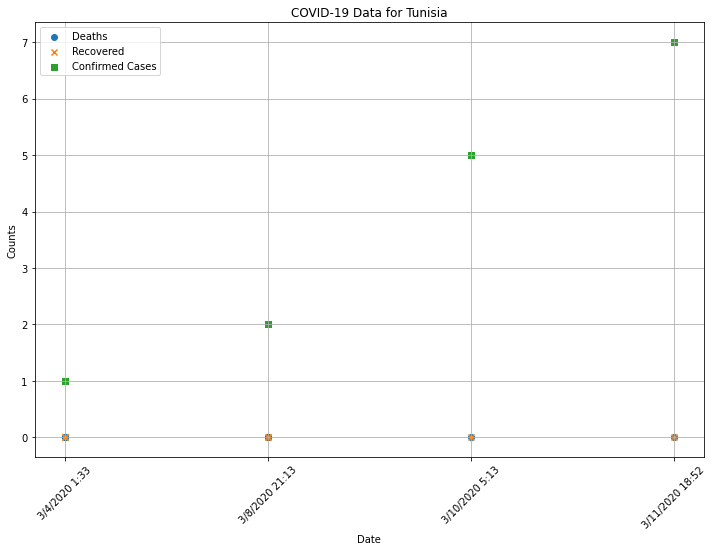

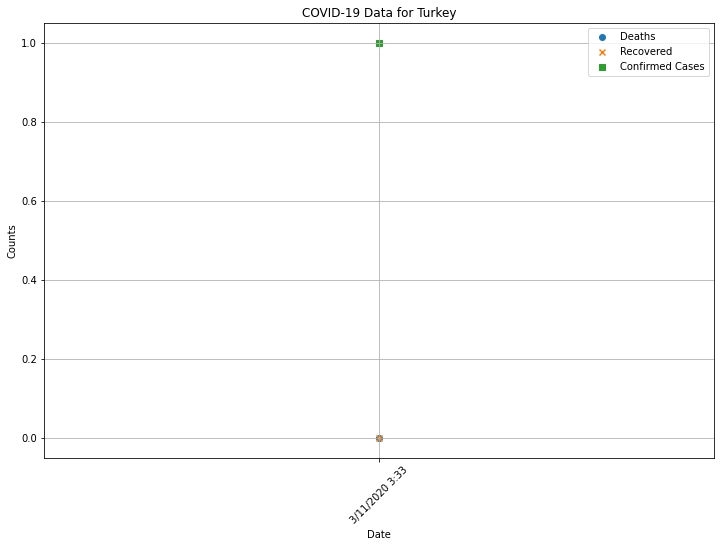

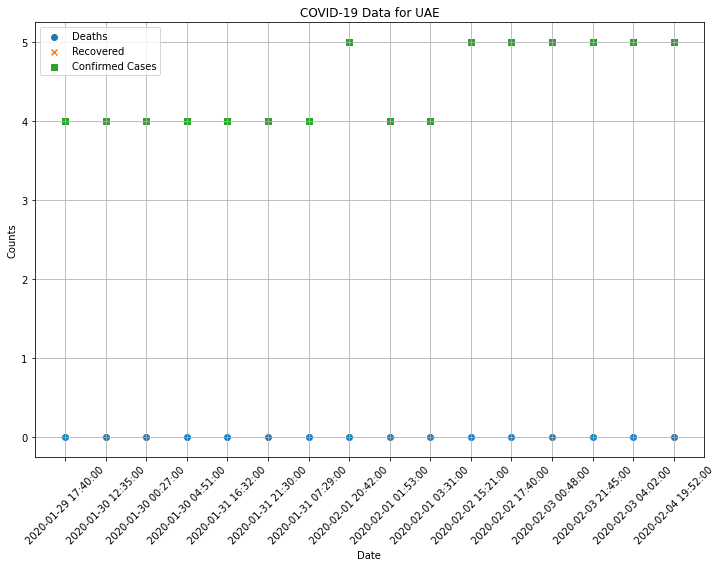

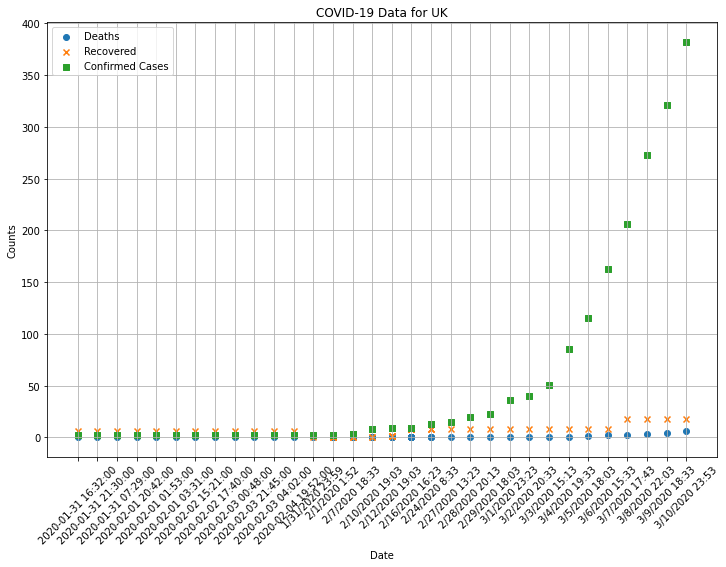

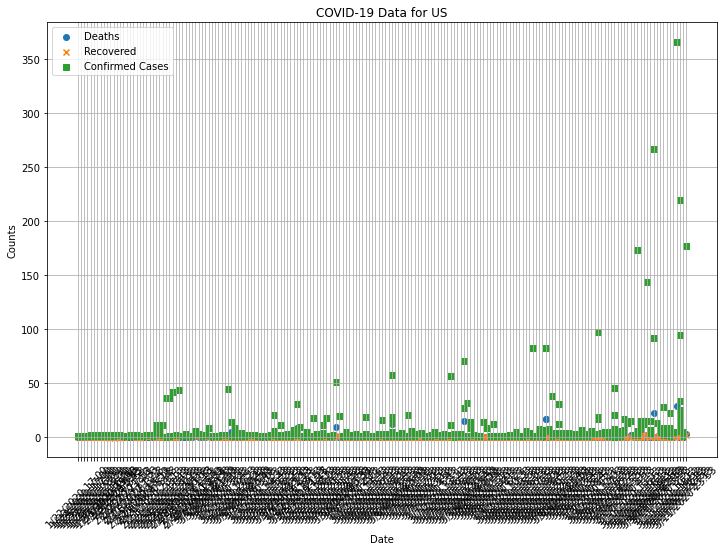

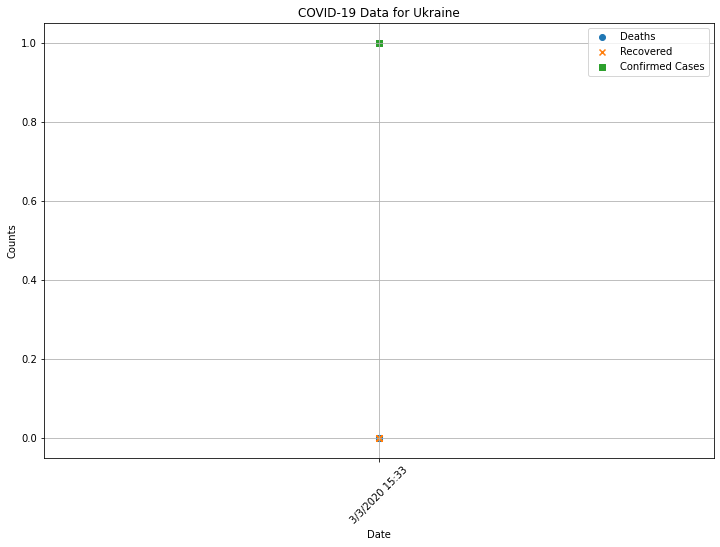

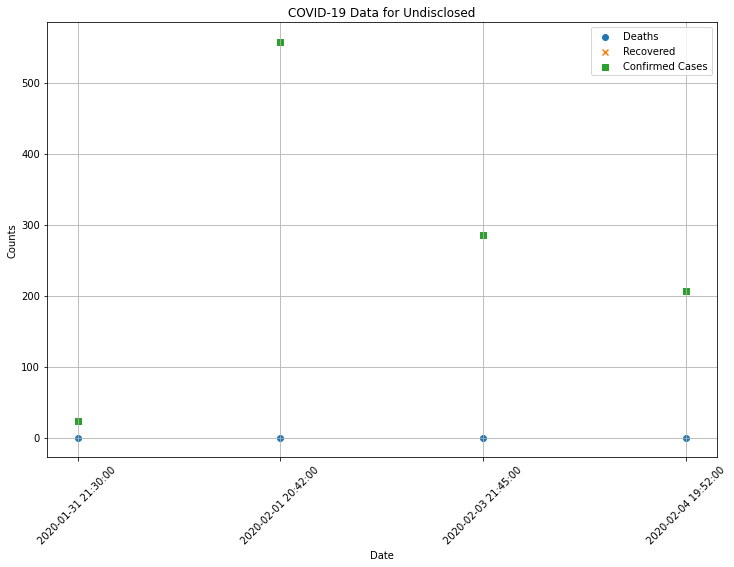

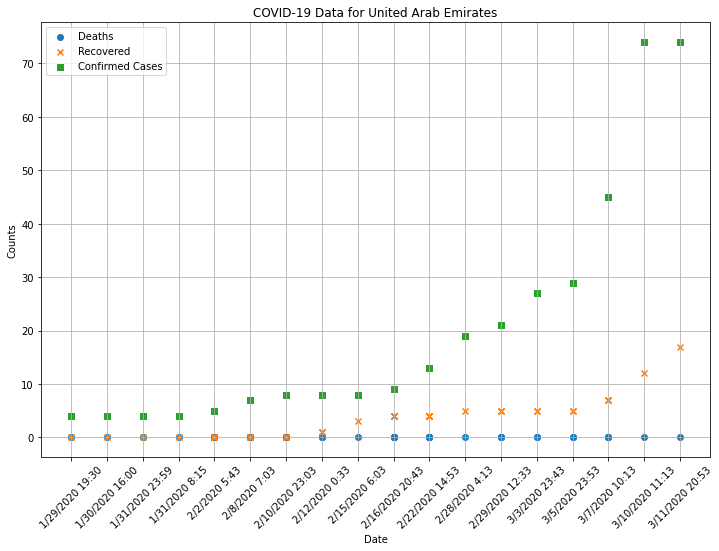

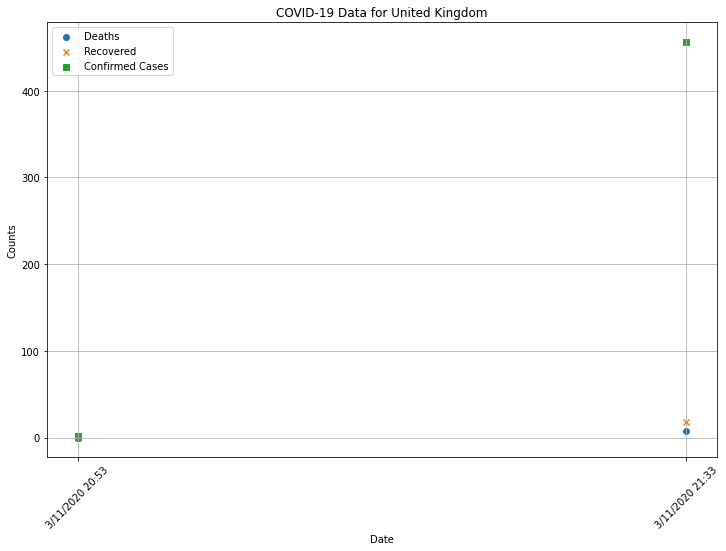

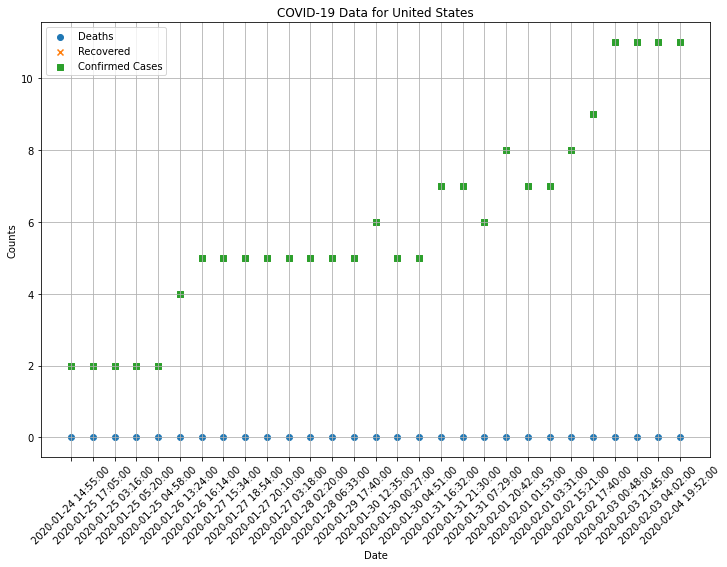

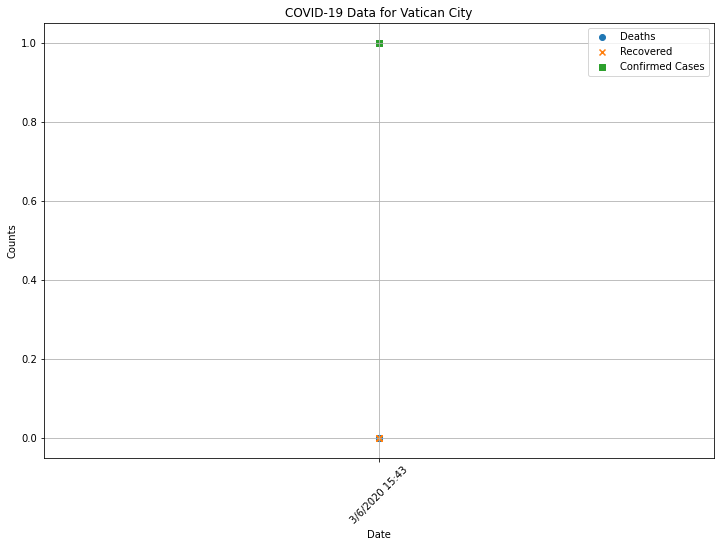

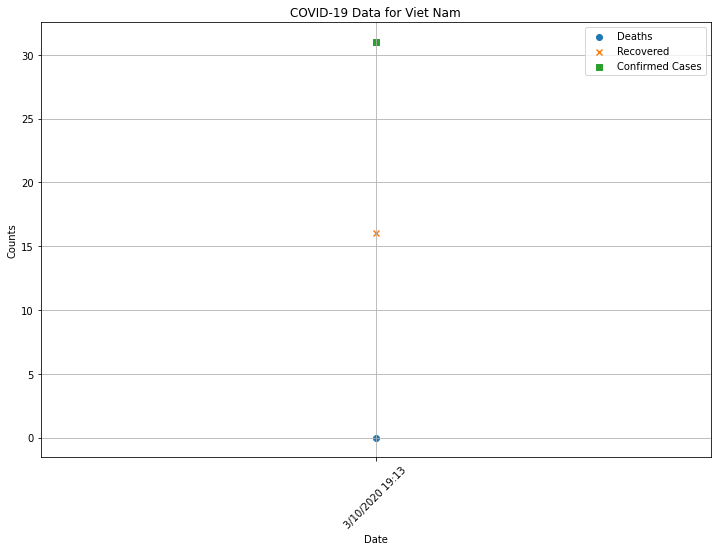

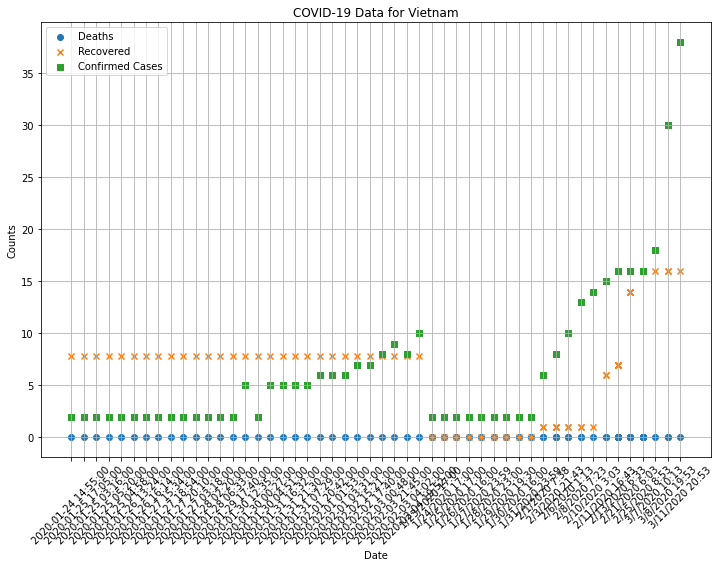

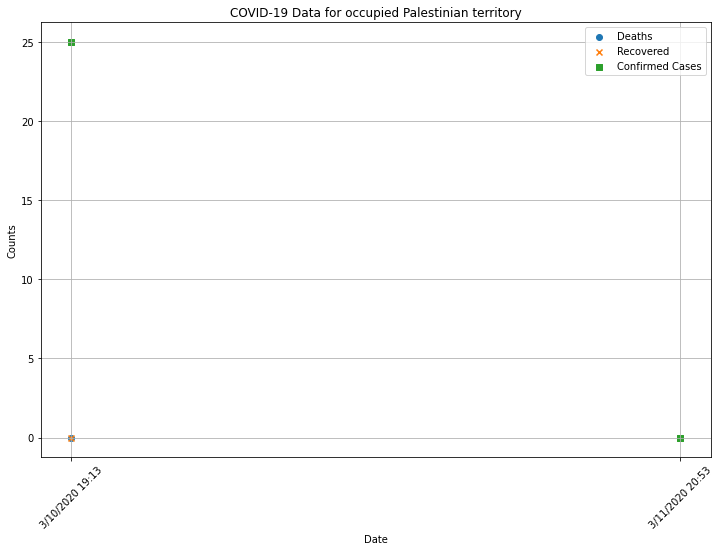

In [21]:
# Plot scatter plots for each country

# Group the data by 'country'
grouped_data = data.groupby('country')

for country, group in grouped_data:
#for country in df:
    plt.figure(figsize=(12, 8))  
    plt.scatter(group['update_time'], group['deaths'], label='Deaths', marker='o')
    plt.scatter(group['update_time'], group['recovered'], label='Recovered', marker='x')
    plt.scatter(group['update_time'], group['confirmed_cases'], label='Confirmed Cases', marker='s')
    plt.xlabel('Date')
    plt.ylabel('Counts')
    plt.title(f'COVID-19 Data for {country}')
    plt.legend()
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.show()

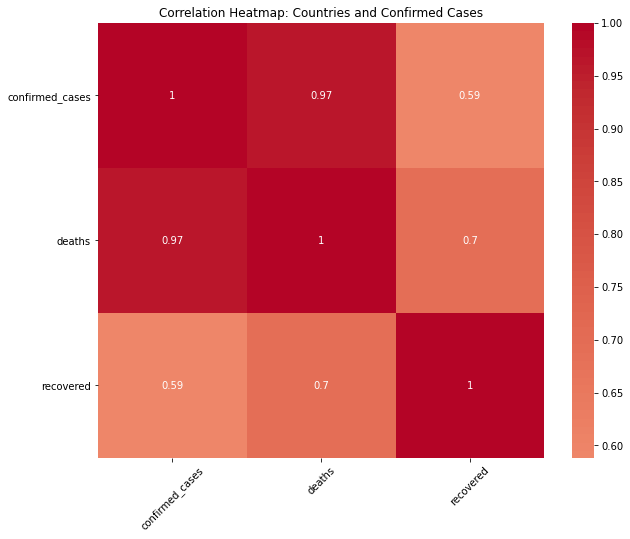

In [22]:
# Compute the correlation matrix
correlation_matrix = data.corr()

# Create a heatmap using Seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap: Countries and Confirmed Cases')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()

## Iran:

In [23]:
Iran_data = data[data['country'] == 'Iran']  ###This is interactive, just change the country you want to evaluate 

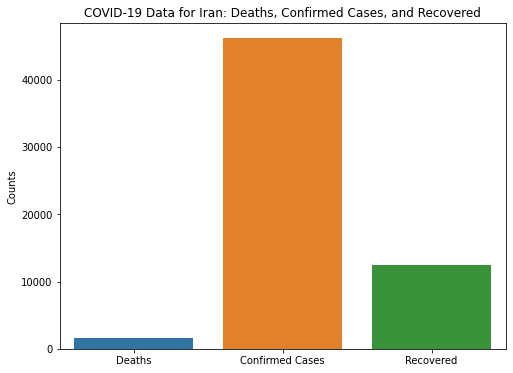

In [24]:
# Calculate the sum of deaths, confirmed cases, and recovered cases
sum_deaths = Iran_data['deaths'].sum()
sum_confirmed_cases = Iran_data['confirmed_cases'].sum()
sum_recovered = Iran_data['recovered'].sum()

# Create a bar graph using Seaborn
plt.figure(figsize=(8, 6))
sns.barplot(x=['Deaths', 'Confirmed Cases', 'Recovered'], y=[sum_deaths, sum_confirmed_cases, sum_recovered])
plt.ylabel('Counts')
plt.title('COVID-19 Data for Iran: Deaths, Confirmed Cases, and Recovered')
plt.show()

<Figure size 2880x2160 with 0 Axes>

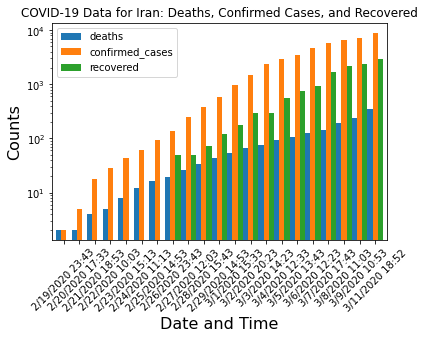

In [25]:
plt.figure(figsize=(40, 30))
Iran_data.plot(kind='bar', x='update_time', y=['deaths', 'confirmed_cases', 'recovered'], width=1)

plt.ylabel('Counts', fontsize=16)
plt.yscale('log')  # Set the y-axis to log scale to get full view of data
plt.xlabel('Date and Time', fontsize=16)
plt.title('COVID-19 Data for Iran: Deaths, Confirmed Cases, and Recovered', fontsize=12)
plt.xticks(rotation=45)
plt.show()

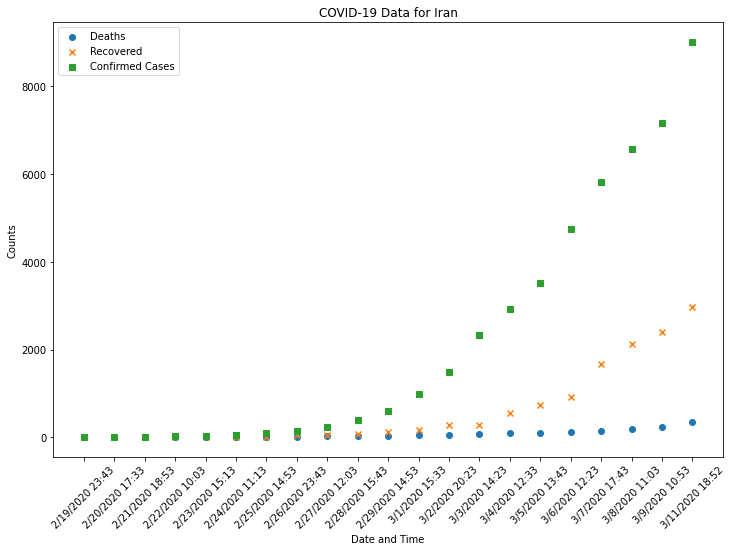

In [26]:
# Create a scatter plot
plt.figure(figsize=(12, 8)) 
plt.scatter(Iran_data['update_time'], Iran_data['deaths'], label='Deaths', marker='o')
plt.scatter(Iran_data['update_time'], Iran_data['recovered'], label='Recovered', marker='x')
plt.scatter(Iran_data['update_time'], Iran_data['confirmed_cases'], label='Confirmed Cases', marker='s')
plt.xlabel('Date and Time')
plt.ylabel('Counts')
plt.title('COVID-19 Data for Iran')
plt.legend()
plt.xticks(rotation=45)
#plt.grid(True)
plt.show()

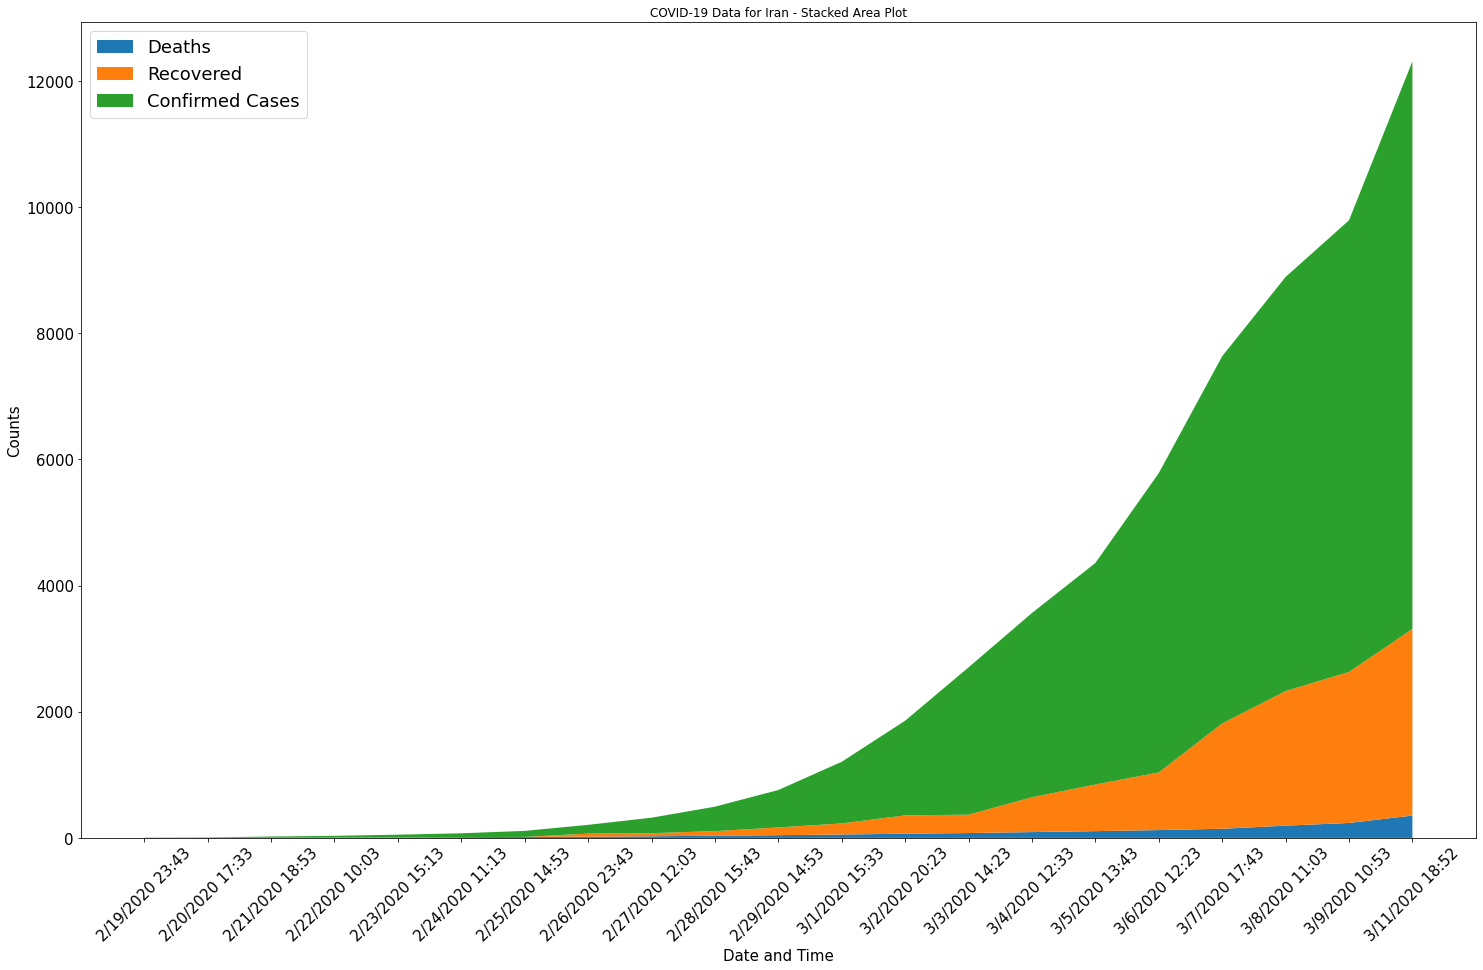

In [27]:
#Creating a stacked area plot for SOuth Africa: 

plt.figure(figsize=(25, 15))  
plt.stackplot(Iran_data['update_time'],
              Iran_data['deaths'],
              Iran_data['recovered'],
              Iran_data['confirmed_cases'],
              labels=['Deaths', 'Recovered', 'Confirmed Cases'])

plt.xlabel('Date and Time', fontsize = 15)
plt.ylabel('Counts',  fontsize = 15)
plt.title('COVID-19 Data for Iran - Stacked Area Plot')
plt.legend(loc='upper left', fontsize = 18)
plt.xticks(rotation=45, fontsize = 15)
plt.yticks(fontsize= 15)
#plt.grid(True)
plt.show()

C:\Users\matlo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


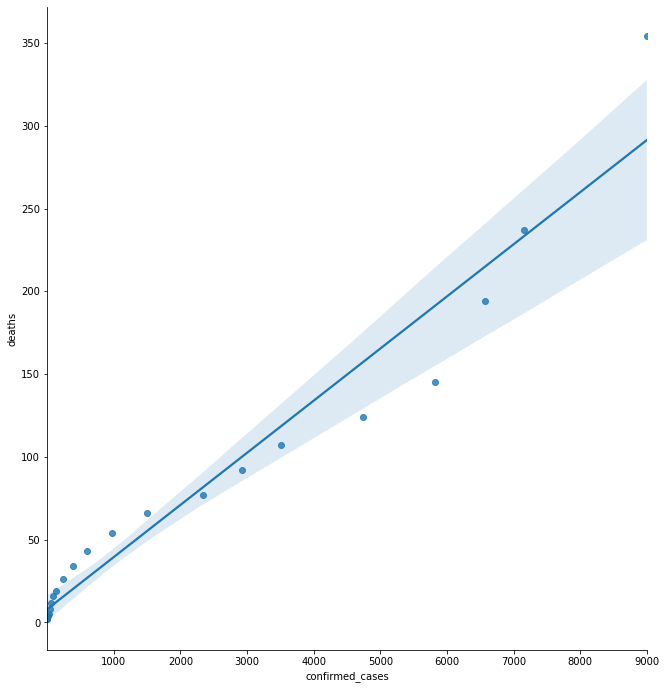

In [28]:
g = sns.lmplot('confirmed_cases',   # x-axis
               'deaths',# y-axis
               data= Iran_data,       # dataframe
               fit_reg=True)   # fit regression line

g.fig.set_size_inches(10,10)

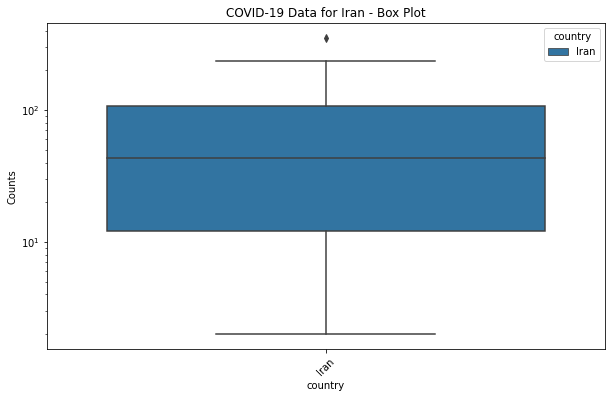

In [29]:
#Investigate the statistics of covid in Iran with a boxplot:
# check for any outliers

plt.figure(figsize=(10, 6)) 
sns.boxplot(data=Iran_data, x='country', y='deaths', hue='country')
plt.ylabel('Counts')
plt.yscale('log')
plt.title('COVID-19 Data for Iran - Box Plot')
plt.xticks(rotation=45)
#plt.grid(True)
plt.show()

## Linear Regression Model 

In [30]:
# Split the data into features (X) and target (y)
X = Iran_data[['confirmed_cases']]
y = Iran_data['deaths']


In [31]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [32]:
# Make predictions on the test set
y_pred = model.predict(X_test)

from sklearn.metrics import mean_squared_error, r2_score




In [33]:
##Evaluate the model:
mse = mean_squared_error(y_test, y_pred)   #calculate the mean square erro
print(f'Mean Squared Error: {mse:.2f}')

# Calculate R-squared
r2 = r2_score(y_test, y_pred)
print(f'R-squared: {r2:.2f}')

Mean Squared Error: 690.28
R-squared: 0.80


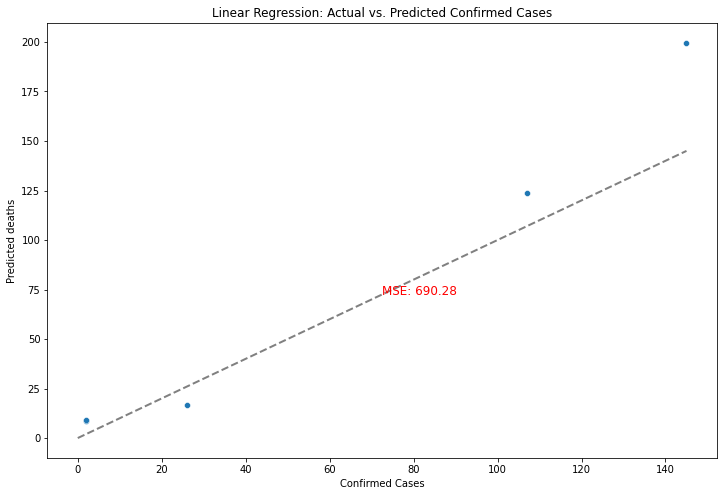

In [34]:
# Plot the actual vs. predicted values
plt.figure(figsize=(12, 8))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([0, y_test.max()], [0, y_test.max()], color='gray', linestyle='--', linewidth=2)  # Diagonal line
plt.annotate(f'MSE: {mse:.2f}', (0.5 * y_test.max(), 0.5 * y_test.max()), color='red', fontsize=12)
plt.xlabel('Confirmed Cases')
plt.ylabel('Predicted deaths')
plt.title('Linear Regression: Actual vs. Predicted Confirmed Cases')
plt.show()

#### Check the difference in the model when hyperparamter tuning is done: 

Best Parameters: {'fit_intercept': True, 'normalize': True}
Best Model Mean Squared Error: 690.28
R-squared: 0.80


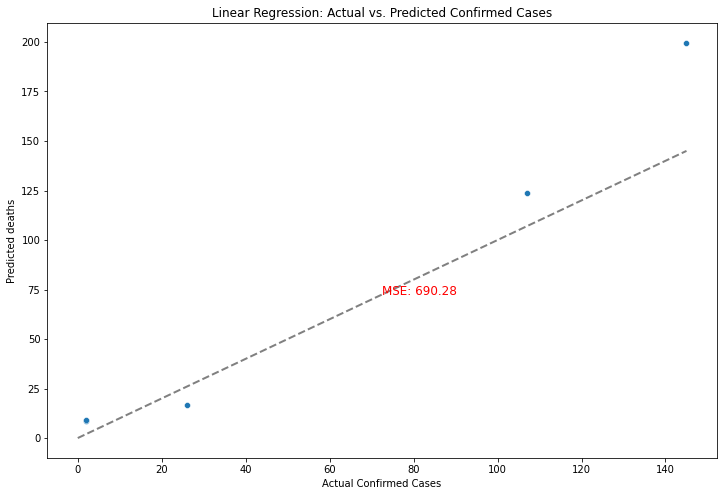

In [35]:
from sklearn.model_selection import train_test_split, GridSearchCV


# Define the hyperparameters to tune
param_grid = {
    'fit_intercept': [True, False],
    'normalize': [True, False]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(model, param_grid, cv=5)

# Fit the model with hyperparameter tuning
grid_search.fit(X_train, y_train)

# Get the best parameters and best model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Fit the best model to the entire training data
best_model.fit(X_train, y_train)  # This step was missing in the previous response

# Make predictions on the test set using the best model
y_pred = best_model.predict(X_test)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f'Best Parameters: {best_params}')
print(f'Best Model Mean Squared Error: {mse:.2f}')

# Calculate R-squared
r2 = r2_score(y_test, y_pred)
print(f'R-squared: {r2:.2f}')

# Plot the actual vs. predicted values
plt.figure(figsize=(12, 8))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([0, y_test.max()], [0, y_test.max()], color='gray', linestyle='--', linewidth=2)  # Diagonal line
plt.annotate(f'MSE: {mse:.2f}', (0.5 * y_test.max(), 0.5 * y_test.max()), color='red', fontsize=12)
plt.xlabel('Actual Confirmed Cases')
plt.ylabel('Predicted deaths')
plt.title('Linear Regression: Actual vs. Predicted Confirmed Cases')
plt.show()

#### There are no changes to the MSE and the R-squared value after applying the hyperparameter tuning